In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_classification_functions
import custom_models
from custom_classification_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = True

apply_scaffold_split = True

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "FP"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_classification_random_gnn/model_gnn_conv"
    else:
        filename_basic = "results_classification_random_fp/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_classification_scaffold_gnn/model_gnn_conv"
    else:
        filename_basic = "results_classification_scaffold_fp/model_gnn_conv"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001
batch_size = 1024

In [6]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [1, 2, 3]
    param_combinations_fp["fpSize"] = [512, 1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [10]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [11]:
print(len(combinations))

72


run: 0
{'radius': 1, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B6E065AF0>, <dgl.data.utils.Subset object at 0x0000015B31C365E0>, <dgl.data.utils.Subset object at 0x0000015B31C36850>]


[20:51:50] WARNING: not removing hydrogen atom without neighbors
[20:51:50] WARNING: not removing hydrogen atom without neighbors
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 0.23949650652480847 | Validation Loss 0.1761673778295517 | Validation accuracy 0.9630399816176471


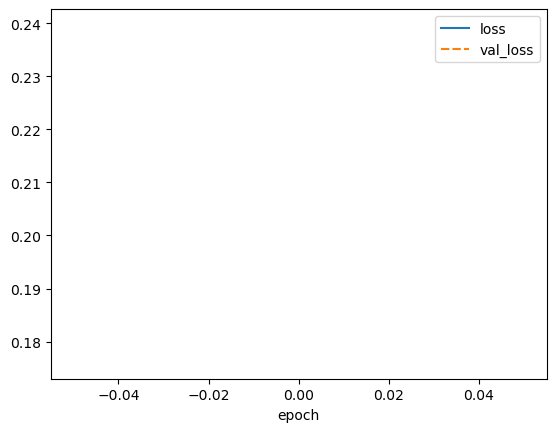

best weights loaded


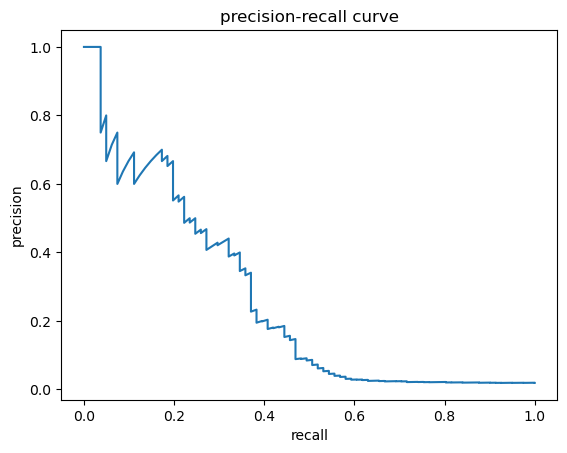

elapsed time: 48.07645869255066
run: 1
{'radius': 1, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B103005E0>, <dgl.data.utils.Subset object at 0x0000015C08BD1280>, <dgl.data.utils.Subset object at 0x0000015C08BD14F0>]


[20:52:35] WARNING: not removing hydrogen atom without neighbors
[20:52:35] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23178574804103735 | Validation Loss 0.17301612496376037 | Validation accuracy 0.9630399816176471


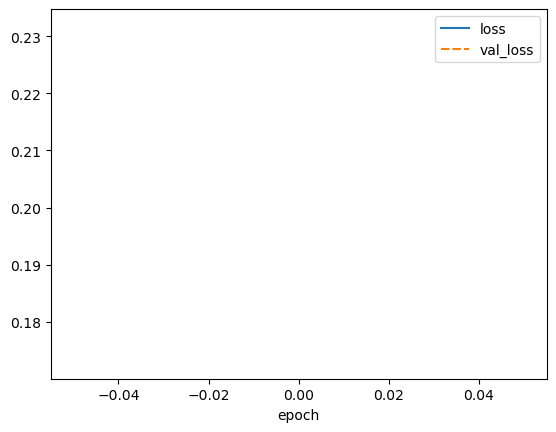

best weights loaded


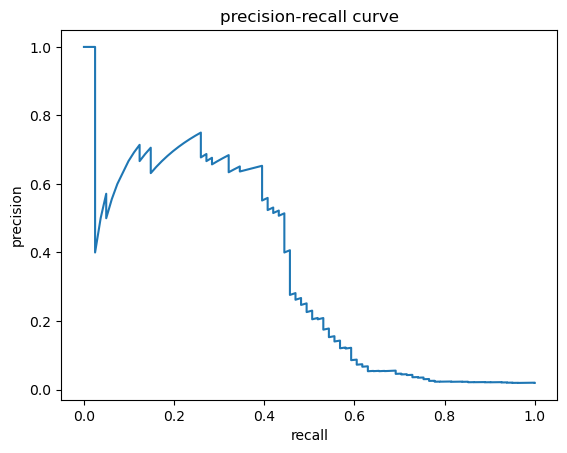

elapsed time: 49.81801962852478
run: 2
{'radius': 1, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B10351250>, <dgl.data.utils.Subset object at 0x0000015B32D44970>, <dgl.data.utils.Subset object at 0x0000015B32D44EB0>]


[20:53:26] WARNING: not removing hydrogen atom without neighbors
[20:53:26] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20345342497933994 | Validation Loss 0.11798073574900628 | Validation accuracy 0.974609375


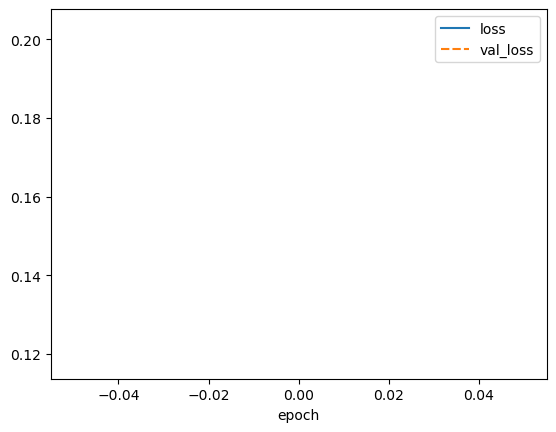

best weights loaded


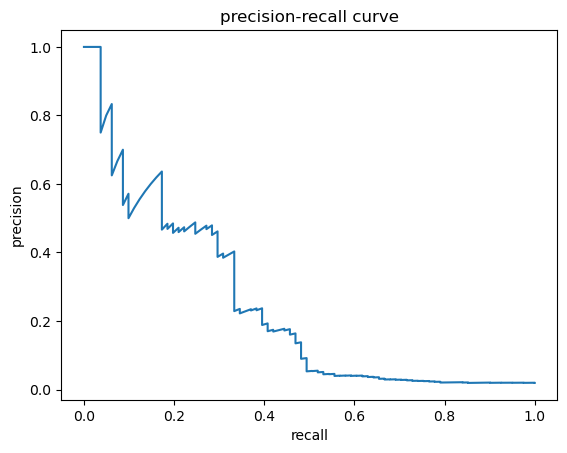

elapsed time: 45.83030414581299
run: 3
{'radius': 1, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1047AD90>, <dgl.data.utils.Subset object at 0x0000015B10328370>, <dgl.data.utils.Subset object at 0x0000015C08BB4D30>]


[20:54:13] WARNING: not removing hydrogen atom without neighbors
[20:54:13] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19358331687522656 | Validation Loss 0.10666994489729405 | Validation accuracy 0.974609375


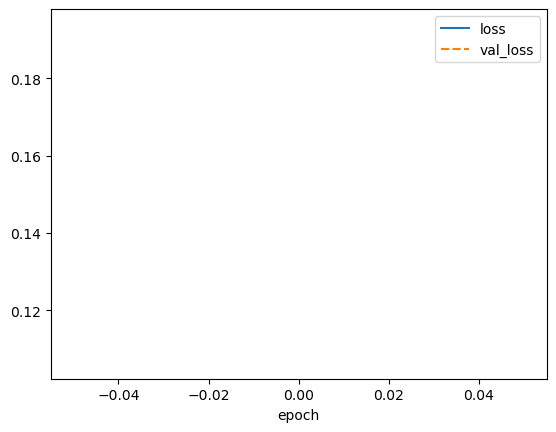

best weights loaded


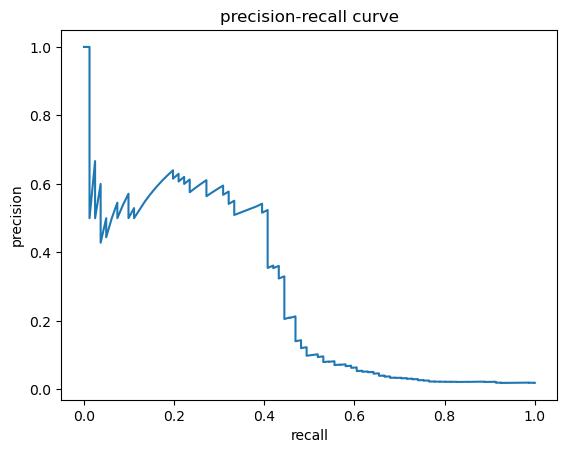

elapsed time: 46.10291004180908
run: 4
{'radius': 1, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B104211C0>, <dgl.data.utils.Subset object at 0x0000015B32D1A640>, <dgl.data.utils.Subset object at 0x0000015B32D1A8B0>]


[20:54:58] WARNING: not removing hydrogen atom without neighbors
[20:54:58] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21048477698456158 | Validation Loss 0.17541130036115646 | Validation accuracy 0.9630399816176471


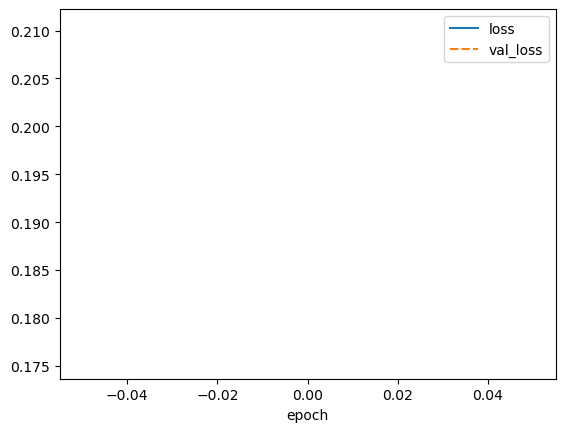

best weights loaded


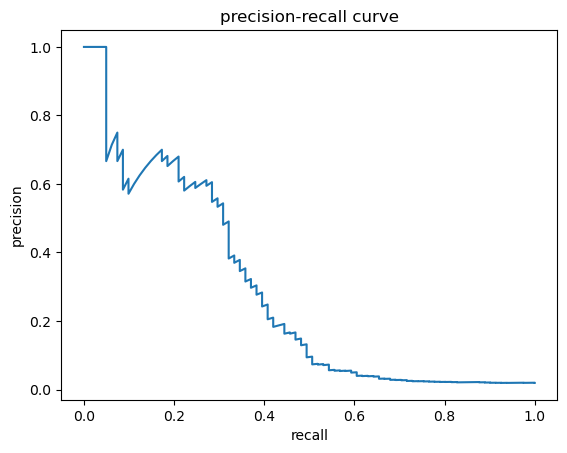

elapsed time: 43.82367205619812
run: 5
{'radius': 1, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B105F8BE0>, <dgl.data.utils.Subset object at 0x0000015C08CA1D90>, <dgl.data.utils.Subset object at 0x0000015C08CA1DF0>]


[20:55:41] WARNING: not removing hydrogen atom without neighbors
[20:55:41] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21063169159672476 | Validation Loss 0.11636445559561252 | Validation accuracy 0.974609375


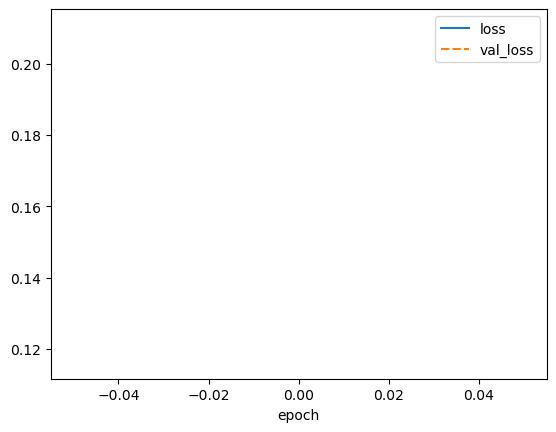

best weights loaded


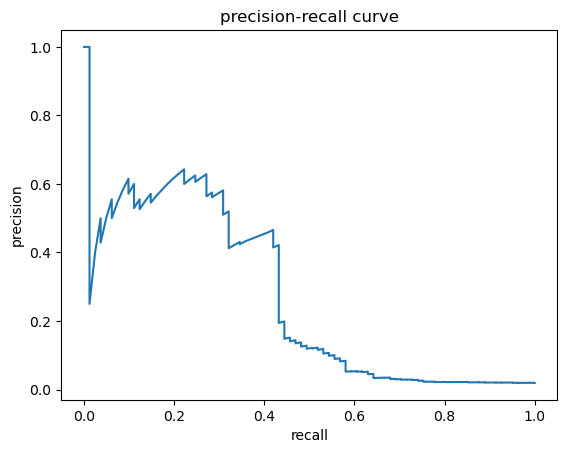

elapsed time: 43.383214712142944
run: 6
{'radius': 1, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B106211F0>, <dgl.data.utils.Subset object at 0x0000015C08CA51F0>, <dgl.data.utils.Subset object at 0x0000015C08CA5760>]


[20:56:26] WARNING: not removing hydrogen atom without neighbors
[20:56:26] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23559958013621243 | Validation Loss 0.15296061784029008 | Validation accuracy 0.974609375


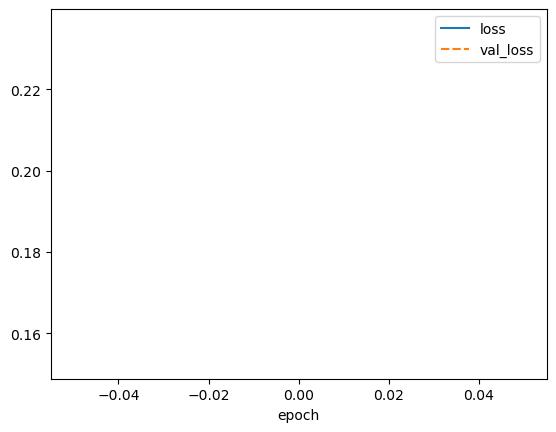

best weights loaded


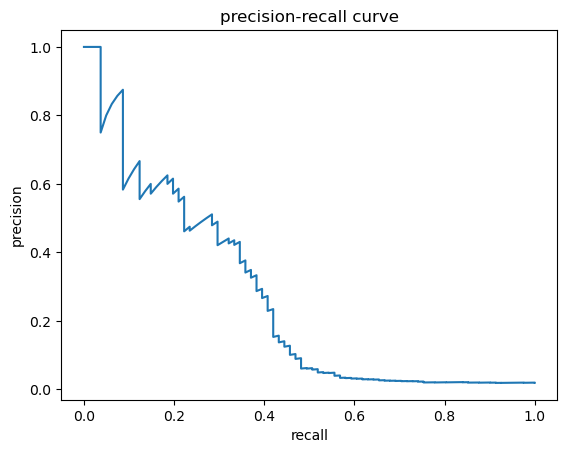

elapsed time: 43.900532960891724
run: 7
{'radius': 1, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0B825AF0>, <dgl.data.utils.Subset object at 0x0000015C08CA58B0>, <dgl.data.utils.Subset object at 0x0000015C08CA5CD0>]


[20:57:10] WARNING: not removing hydrogen atom without neighbors
[20:57:10] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.24775295275630374 | Validation Loss 0.1403155267238617 | Validation accuracy 0.974609375


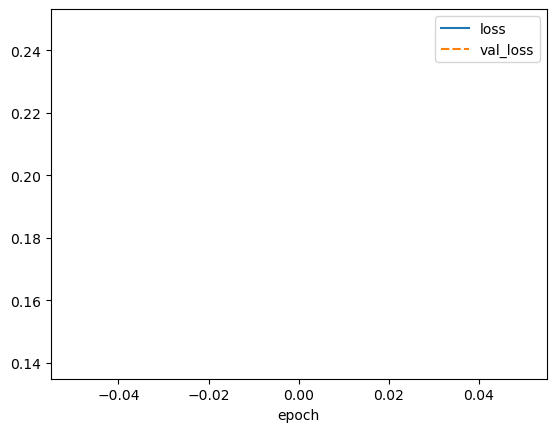

best weights loaded


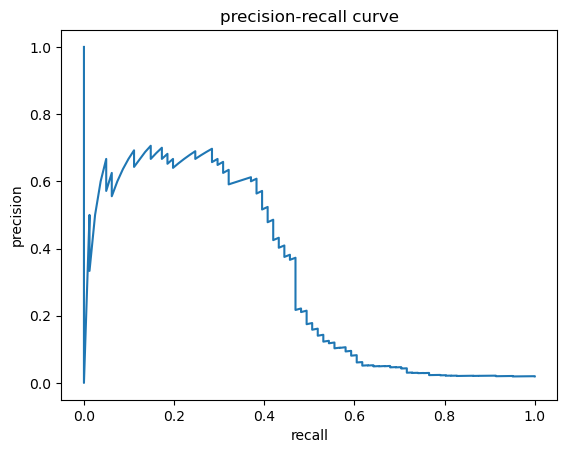

elapsed time: 46.48665976524353
run: 8
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B107EEB80>, <dgl.data.utils.Subset object at 0x0000015C08CA5280>, <dgl.data.utils.Subset object at 0x0000015B10358850>]


[20:57:59] WARNING: not removing hydrogen atom without neighbors
[20:57:59] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21955364242647635 | Validation Loss 0.1332923598587513 | Validation accuracy 0.9748046875


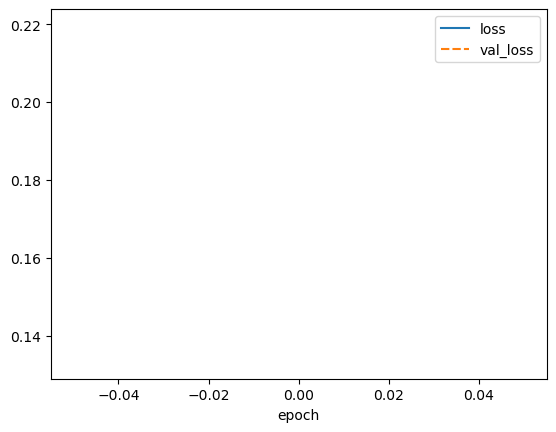

best weights loaded


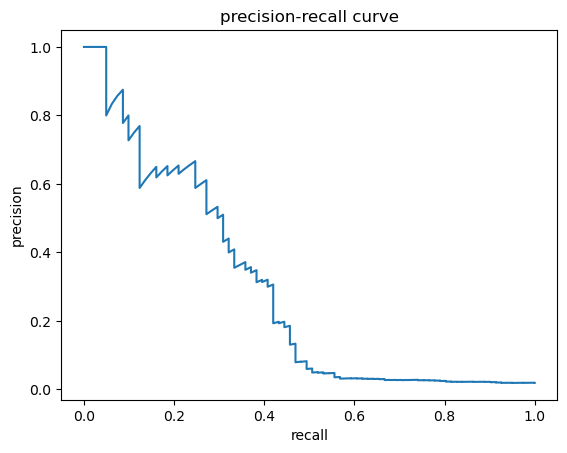

elapsed time: 47.19950795173645
run: 9
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B109CABB0>, <dgl.data.utils.Subset object at 0x0000015B32C76CA0>, <dgl.data.utils.Subset object at 0x0000015B32C76A00>]


[20:58:46] WARNING: not removing hydrogen atom without neighbors
[20:58:46] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.222992340046348 | Validation Loss 0.1392327755689621 | Validation accuracy 0.974609375


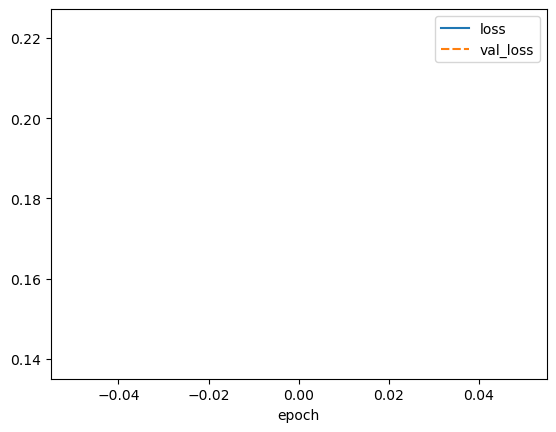

best weights loaded


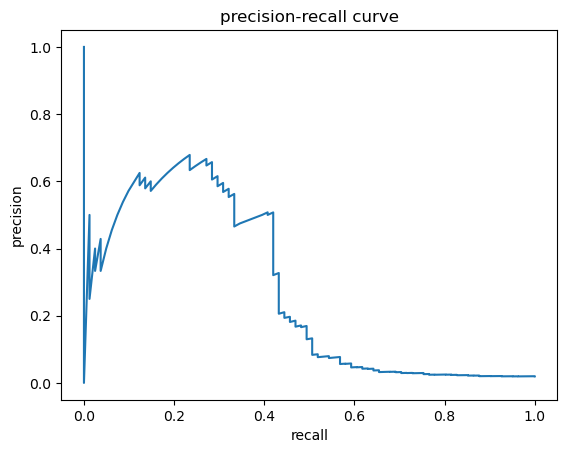

elapsed time: 51.13898801803589
run: 10
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B11ABB130>, <dgl.data.utils.Subset object at 0x0000015B5F6355E0>, <dgl.data.utils.Subset object at 0x0000015B5F635BE0>]


[20:59:40] WARNING: not removing hydrogen atom without neighbors
[20:59:40] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19711287184195084 | Validation Loss 0.11448095515370368 | Validation accuracy 0.974609375


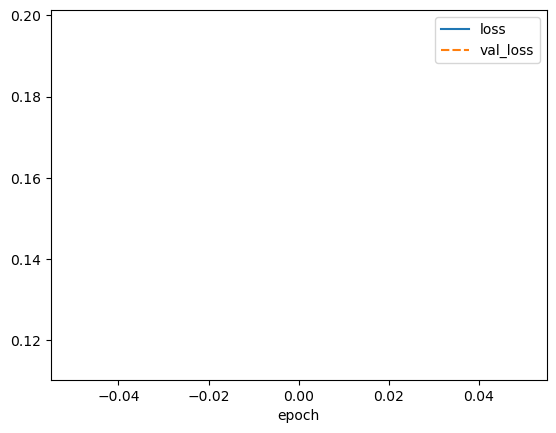

best weights loaded


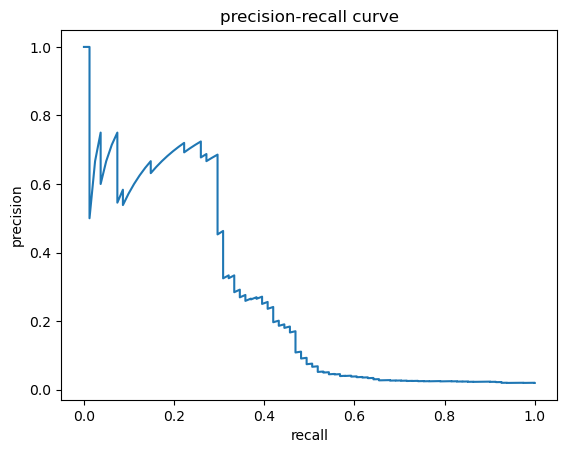

elapsed time: 54.71622323989868
run: 11
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B11D82580>, <dgl.data.utils.Subset object at 0x0000015BF4067AF0>, <dgl.data.utils.Subset object at 0x0000015BF4067D60>]


[21:00:30] WARNING: not removing hydrogen atom without neighbors
[21:00:30] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19749574972824616 | Validation Loss 0.16031830310821532 | Validation accuracy 0.9630399816176471


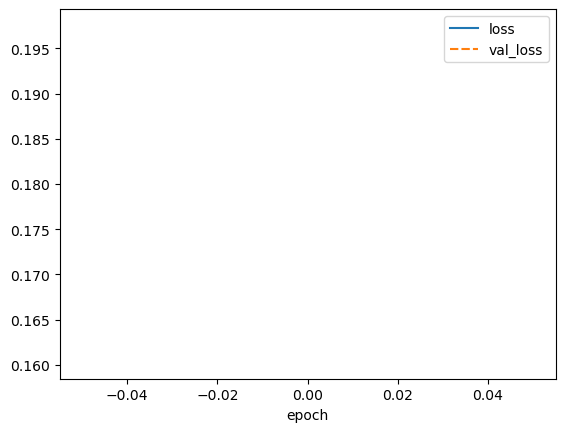

best weights loaded


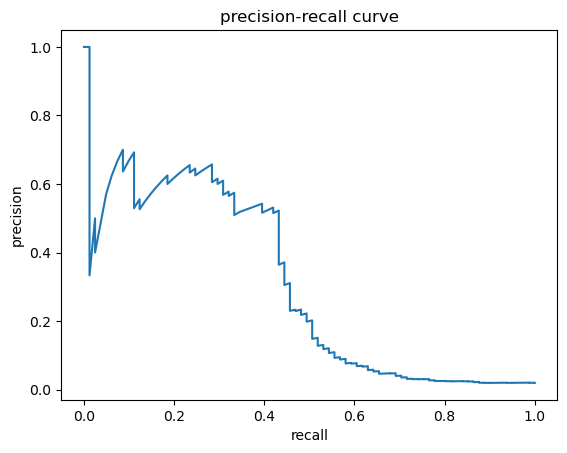

elapsed time: 48.17848181724548
run: 12
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B11D4DBE0>, <dgl.data.utils.Subset object at 0x0000015BF4067F10>, <dgl.data.utils.Subset object at 0x0000015B11DA4400>]


[21:01:18] WARNING: not removing hydrogen atom without neighbors
[21:01:18] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21478164715297293 | Validation Loss 0.17997110188007354 | Validation accuracy 0.9630399816176471


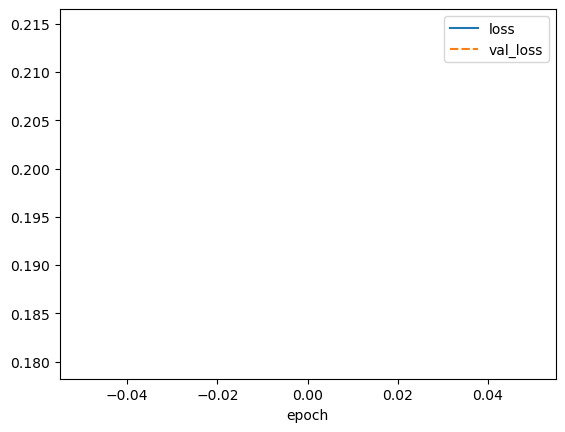

best weights loaded


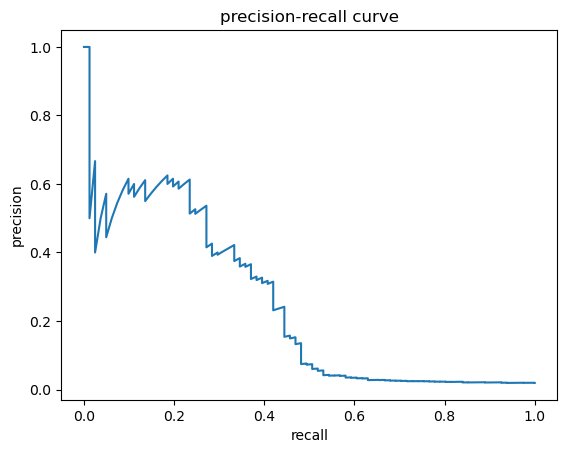

elapsed time: 44.871453523635864
run: 13
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B11DBB580>, <dgl.data.utils.Subset object at 0x0000015B32C76940>, <dgl.data.utils.Subset object at 0x0000015B32C763D0>]


[21:02:03] WARNING: not removing hydrogen atom without neighbors
[21:02:03] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2119804792331927 | Validation Loss 0.11693428941071034 | Validation accuracy 0.974609375


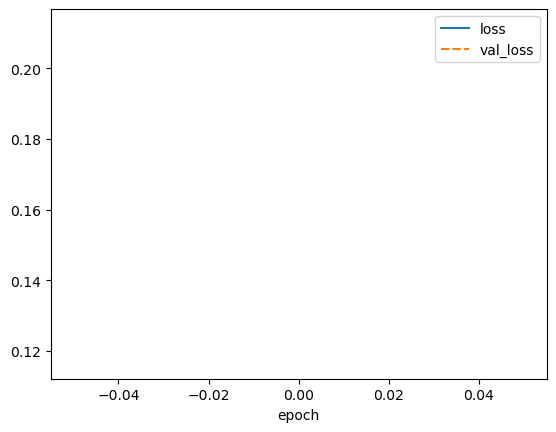

best weights loaded


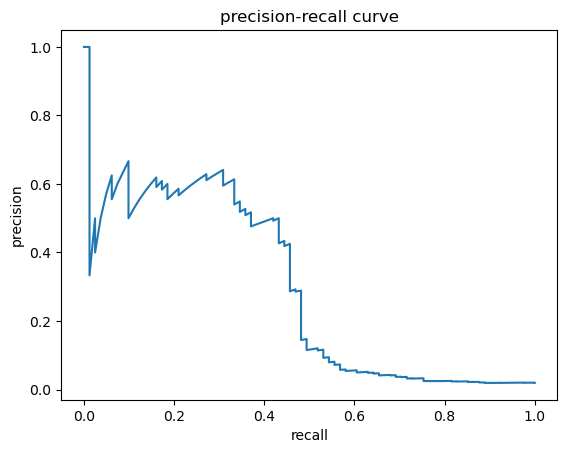

elapsed time: 45.68505907058716
run: 14
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B11D364C0>, <dgl.data.utils.Subset object at 0x0000015B32C64AC0>, <dgl.data.utils.Subset object at 0x0000015B32C64D30>]


[21:02:48] WARNING: not removing hydrogen atom without neighbors
[21:02:48] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2335253461743846 | Validation Loss 0.1464177280664444 | Validation accuracy 0.974609375


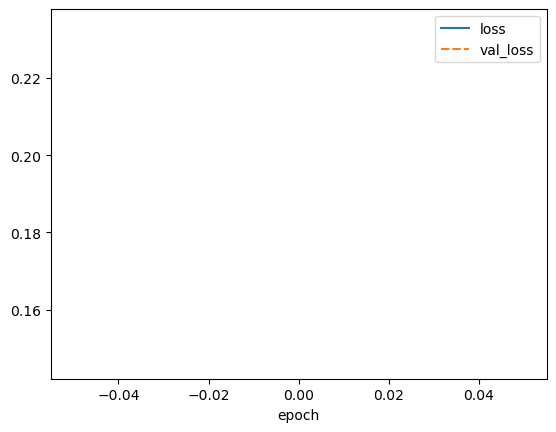

best weights loaded


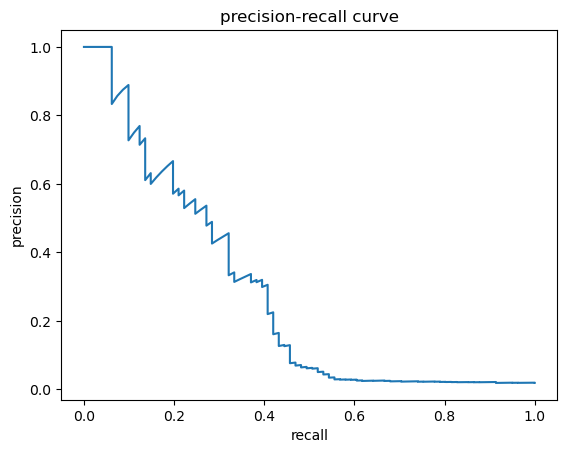

elapsed time: 45.23914623260498
run: 15
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0E3F1D00>, <dgl.data.utils.Subset object at 0x0000015B32C6A670>, <dgl.data.utils.Subset object at 0x0000015B32C6A8E0>]


[21:03:34] WARNING: not removing hydrogen atom without neighbors
[21:03:34] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2468947239897468 | Validation Loss 0.13605350404977798 | Validation accuracy 0.974609375


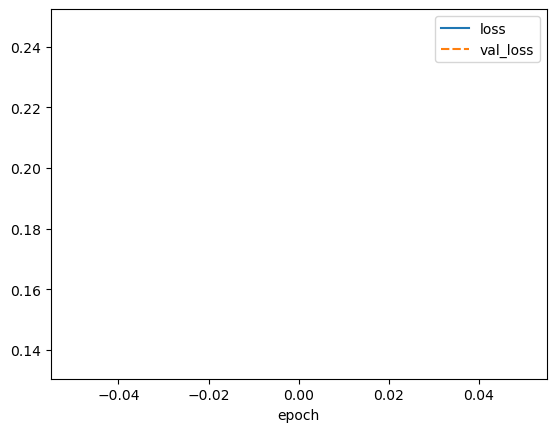

best weights loaded


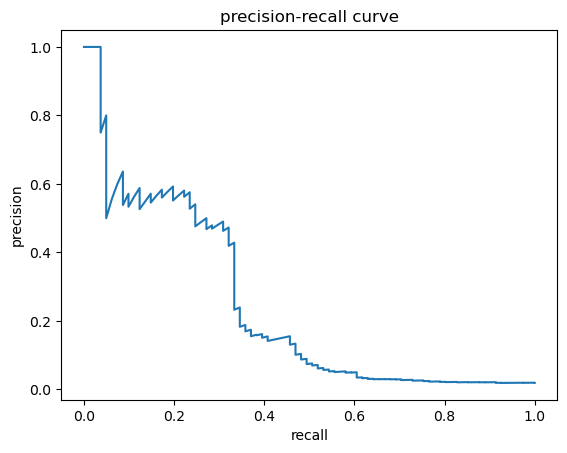

elapsed time: 47.59653067588806
run: 16
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B6E065F70>, <dgl.data.utils.Subset object at 0x0000015B32C6A250>, <dgl.data.utils.Subset object at 0x0000015C08AFFDF0>]


[21:04:24] WARNING: not removing hydrogen atom without neighbors
[21:04:24] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2207368743239027 | Validation Loss 0.16398693323135377 | Validation accuracy 0.9630399816176471


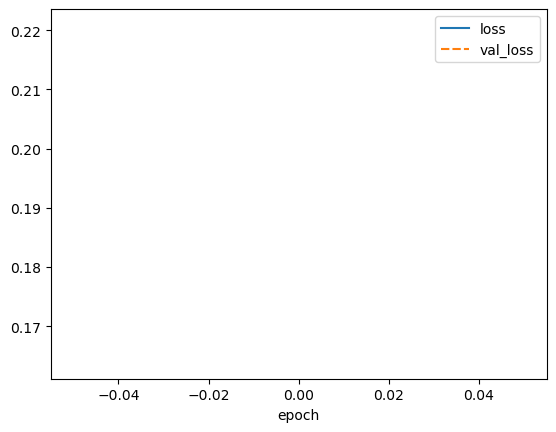

best weights loaded


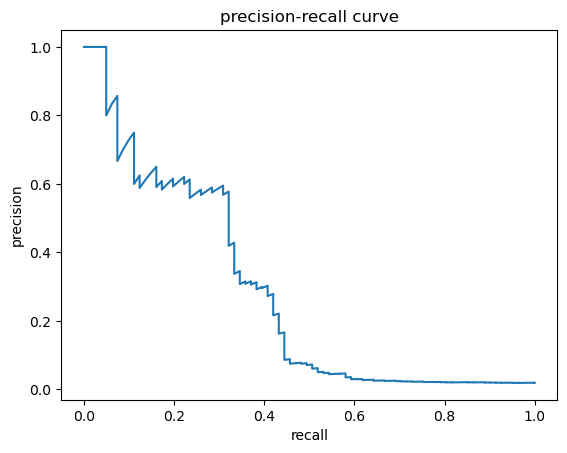

elapsed time: 54.118589639663696
run: 17
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B12433B50>, <dgl.data.utils.Subset object at 0x0000015B32C7BA90>, <dgl.data.utils.Subset object at 0x0000015B32C7BCD0>]


[21:05:19] WARNING: not removing hydrogen atom without neighbors
[21:05:19] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22495693555383972 | Validation Loss 0.14323771744966507 | Validation accuracy 0.974609375


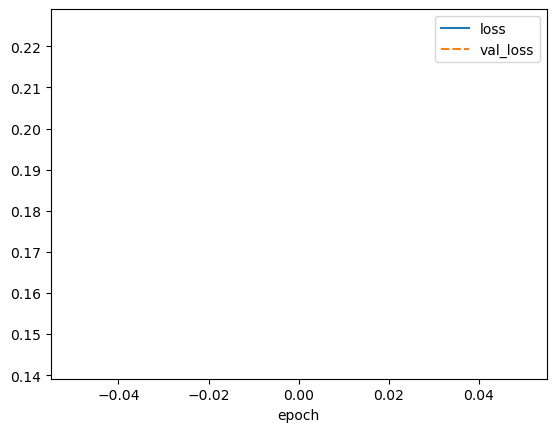

best weights loaded


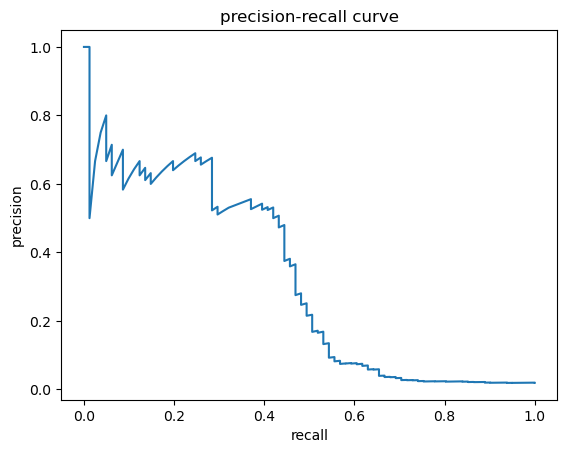

elapsed time: 53.39077877998352
run: 18
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B120CFE80>, <dgl.data.utils.Subset object at 0x0000015C08BDB790>, <dgl.data.utils.Subset object at 0x0000015C08BDBA00>]


[21:06:12] WARNING: not removing hydrogen atom without neighbors
[21:06:12] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20057411017743024 | Validation Loss 0.1485553875565529 | Validation accuracy 0.9630399816176471


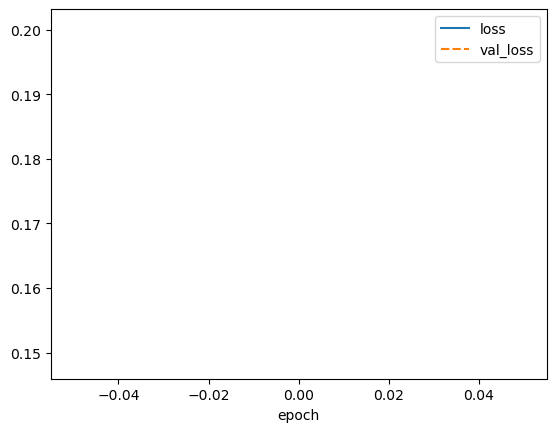

best weights loaded


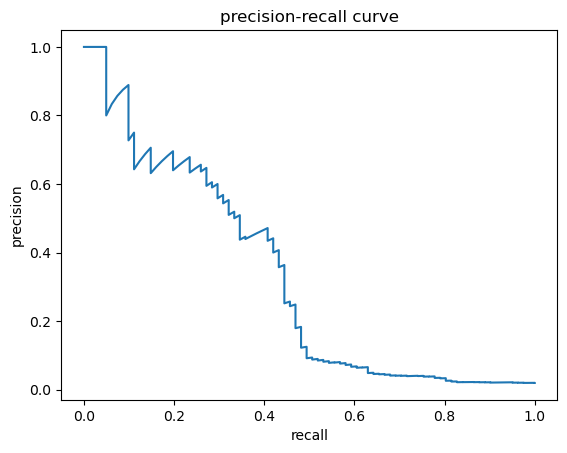

elapsed time: 55.38895630836487
run: 19
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B12416F10>, <dgl.data.utils.Subset object at 0x0000015B32C7B820>, <dgl.data.utils.Subset object at 0x0000015B32C6A9D0>]


[21:07:08] WARNING: not removing hydrogen atom without neighbors
[21:07:08] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19718015893842233 | Validation Loss 0.10947358720004559 | Validation accuracy 0.974609375


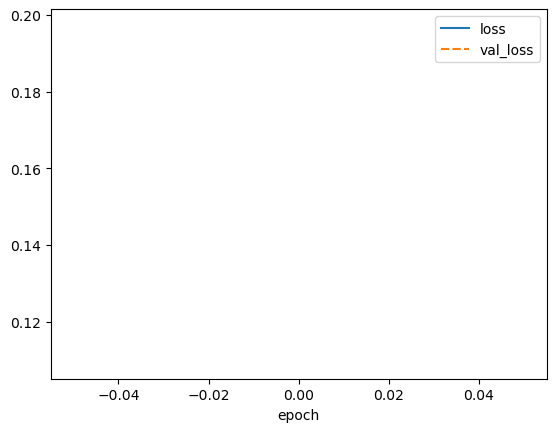

best weights loaded


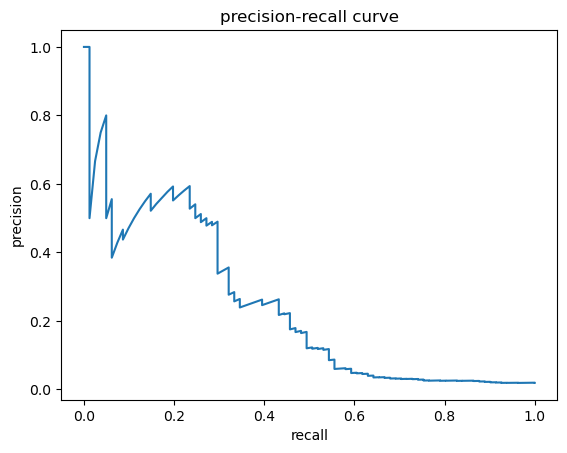

elapsed time: 53.184889793395996
run: 20
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B11E74B50>, <dgl.data.utils.Subset object at 0x0000015C08BDBA90>, <dgl.data.utils.Subset object at 0x0000015C08BDBA00>]


[21:08:00] WARNING: not removing hydrogen atom without neighbors
[21:08:00] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20905291695486417 | Validation Loss 0.11501011848449708 | Validation accuracy 0.974609375


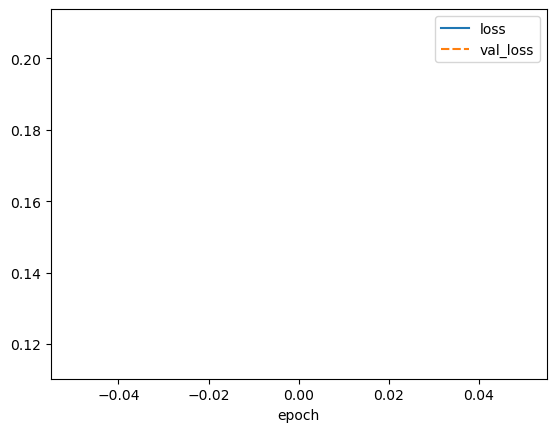

best weights loaded


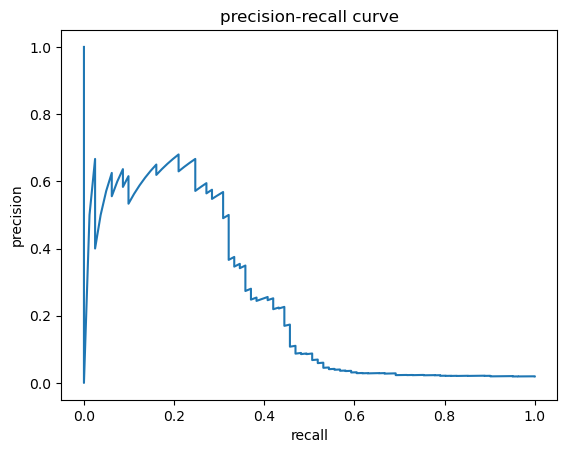

elapsed time: 50.37613606452942
run: 21
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1388CF40>, <dgl.data.utils.Subset object at 0x0000015B5D350D30>, <dgl.data.utils.Subset object at 0x0000015B5D350D90>]


[21:08:51] WARNING: not removing hydrogen atom without neighbors
[21:08:51] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21588811233188165 | Validation Loss 0.13328063637018203 | Validation accuracy 0.9630399816176471


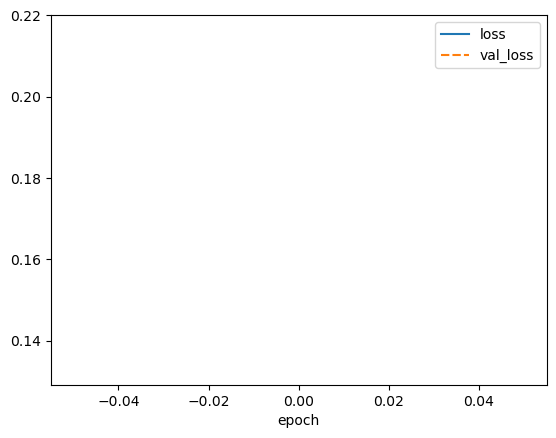

best weights loaded


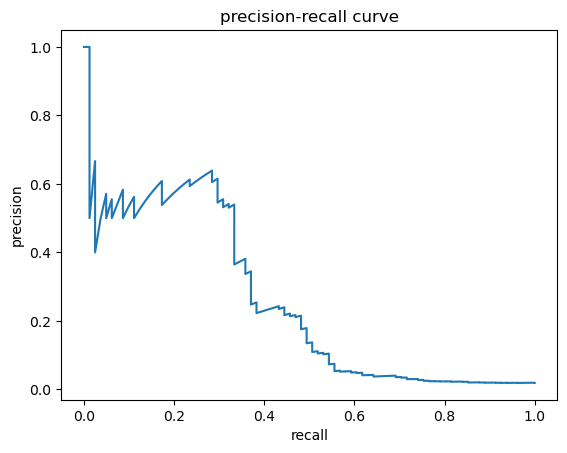

elapsed time: 51.93222379684448
run: 22
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B12893BB0>, <dgl.data.utils.Subset object at 0x0000015B5D350A90>, <dgl.data.utils.Subset object at 0x0000015B5D350B50>]


[21:09:43] WARNING: not removing hydrogen atom without neighbors
[21:09:43] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23552999622894055 | Validation Loss 0.14785541445016862 | Validation accuracy 0.974609375


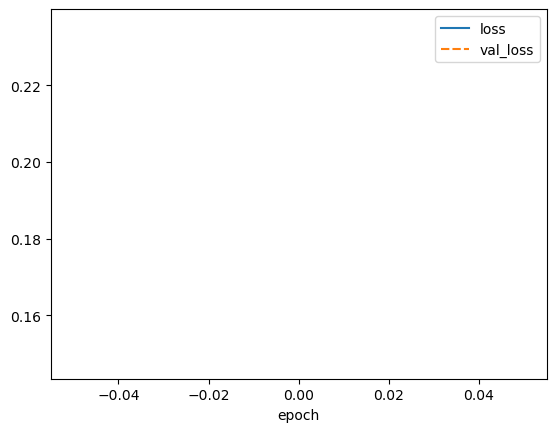

best weights loaded


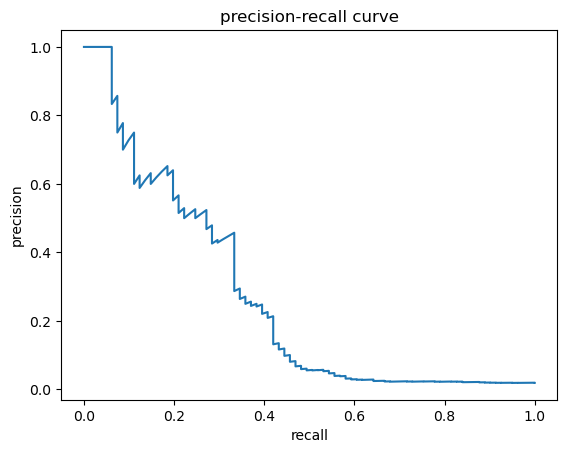

elapsed time: 51.39098072052002
run: 23
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B10AAD790>, <dgl.data.utils.Subset object at 0x0000015B5D350D00>, <dgl.data.utils.Subset object at 0x0000015B12893670>]


[21:10:35] WARNING: not removing hydrogen atom without neighbors
[21:10:35] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23672608399029935 | Validation Loss 0.15341419875621795 | Validation accuracy 0.9630399816176471


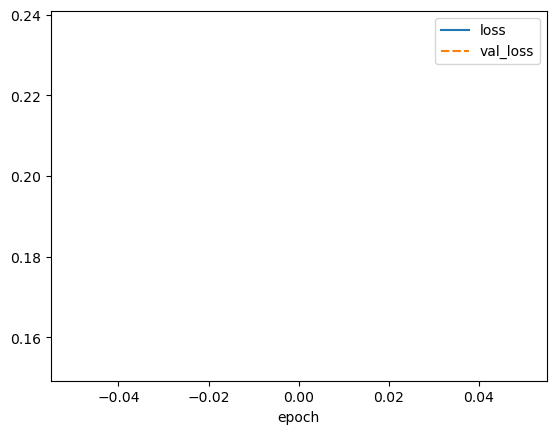

best weights loaded


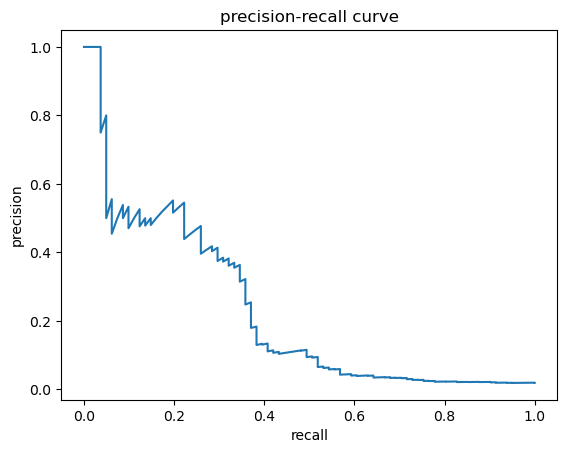

elapsed time: 51.21707892417908
run: 24
{'radius': 2, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B13D01B20>, <dgl.data.utils.Subset object at 0x0000015C08CCCD90>, <dgl.data.utils.Subset object at 0x0000015C08CCCE50>]


[21:11:21] WARNING: not removing hydrogen atom without neighbors
[21:11:21] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21778620598894177 | Validation Loss 0.13512596040964125 | Validation accuracy 0.974609375


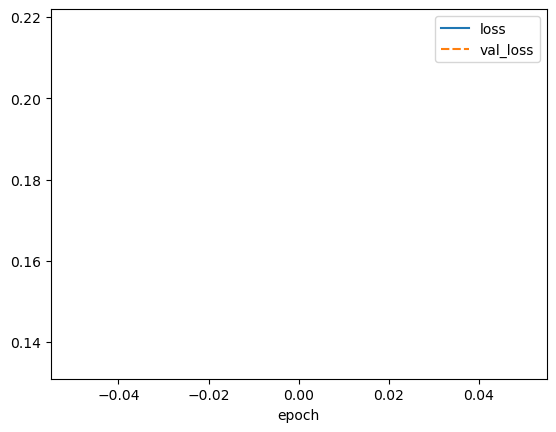

best weights loaded


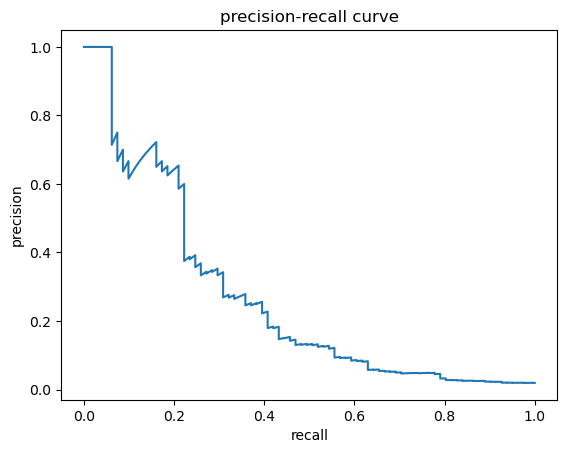

elapsed time: 46.08706331253052
run: 25
{'radius': 2, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0DF933A0>, <dgl.data.utils.Subset object at 0x0000015C08CC7A00>, <dgl.data.utils.Subset object at 0x0000015C08CC7C70>]


[21:12:08] WARNING: not removing hydrogen atom without neighbors
[21:12:08] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22007201792615833 | Validation Loss 0.14853188544511794 | Validation accuracy 0.974609375


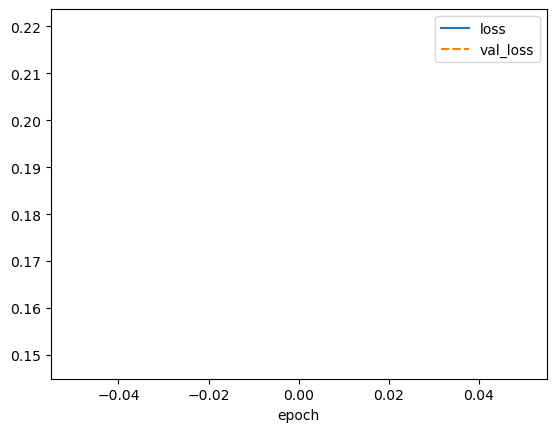

best weights loaded


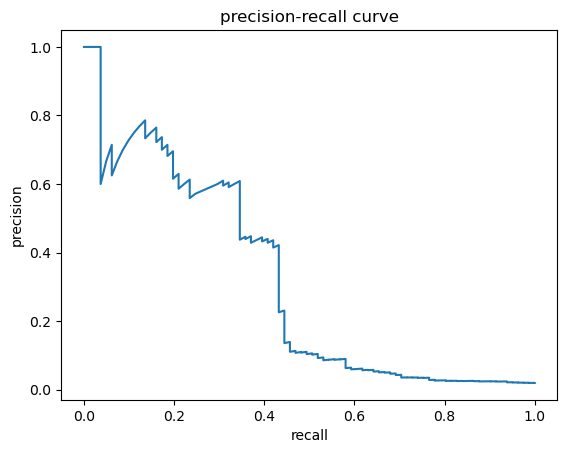

elapsed time: 48.05192494392395
run: 26
{'radius': 2, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B13A15520>, <dgl.data.utils.Subset object at 0x0000015C08BE4B50>, <dgl.data.utils.Subset object at 0x0000015C08BE4F10>]


[21:12:57] WARNING: not removing hydrogen atom without neighbors
[21:12:57] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19635626222148087 | Validation Loss 0.11641325578093528 | Validation accuracy 0.974609375


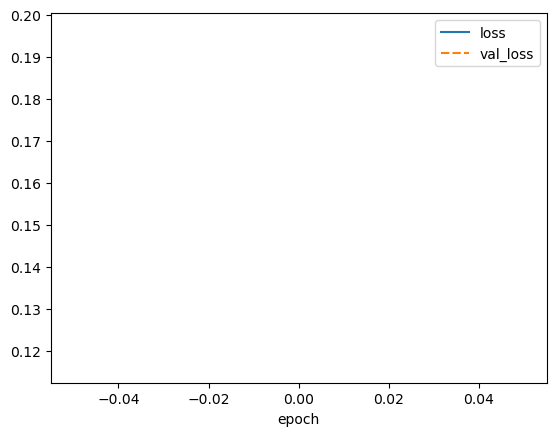

best weights loaded


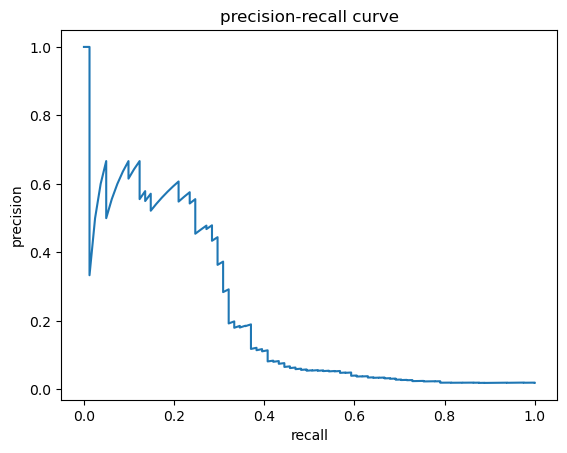

elapsed time: 45.808390855789185
run: 27
{'radius': 2, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B14080C10>, <dgl.data.utils.Subset object at 0x0000015C08C8E7C0>, <dgl.data.utils.Subset object at 0x0000015C08C8EA30>]


[21:13:42] WARNING: not removing hydrogen atom without neighbors
[21:13:42] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19182312285358255 | Validation Loss 0.10762550439685584 | Validation accuracy 0.974609375


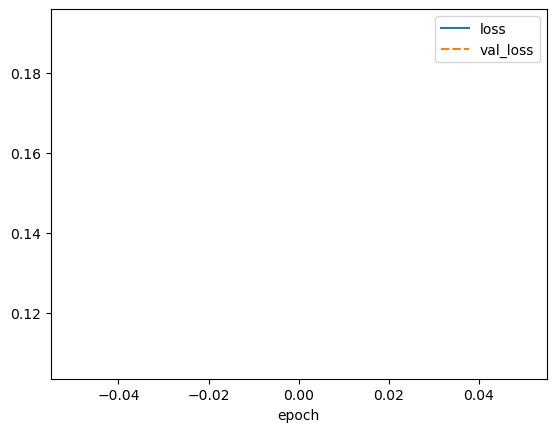

best weights loaded


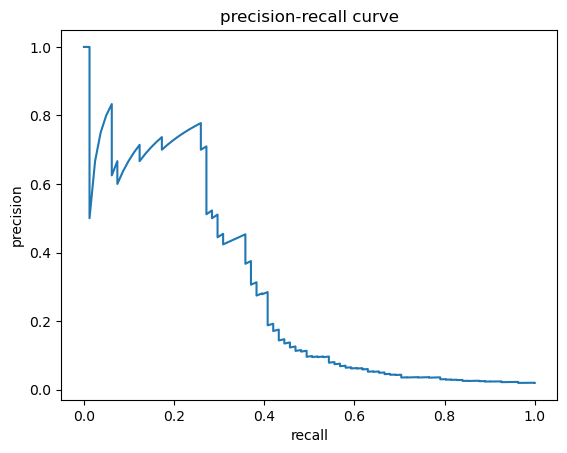

elapsed time: 44.96292781829834
run: 28
{'radius': 2, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B10A0F700>, <dgl.data.utils.Subset object at 0x0000015B140809D0>, <dgl.data.utils.Subset object at 0x0000015B14080C40>]


[21:14:27] WARNING: not removing hydrogen atom without neighbors
[21:14:27] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20085526325485922 | Validation Loss 0.11815789937973023 | Validation accuracy 0.974609375


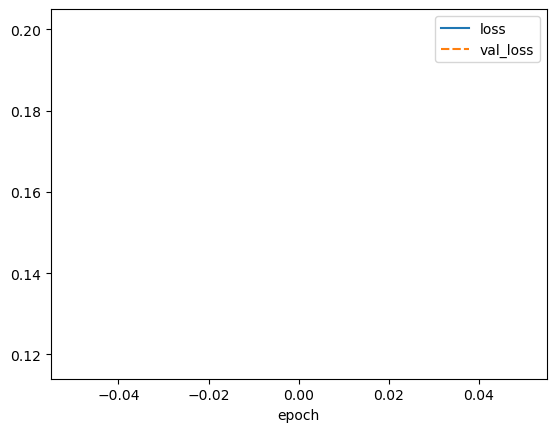

best weights loaded


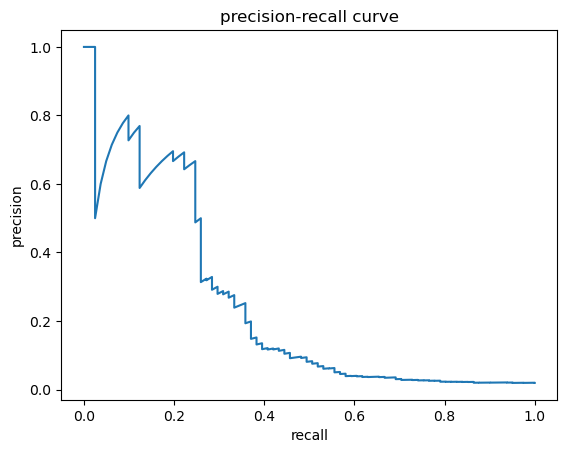

elapsed time: 43.42458248138428
run: 29
{'radius': 2, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B6E0C5DF0>, <dgl.data.utils.Subset object at 0x0000015C0B189430>, <dgl.data.utils.Subset object at 0x0000015C0B1896A0>]


[21:15:10] WARNING: not removing hydrogen atom without neighbors
[21:15:10] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21123123056057727 | Validation Loss 0.15562397837638856 | Validation accuracy 0.9630399816176471


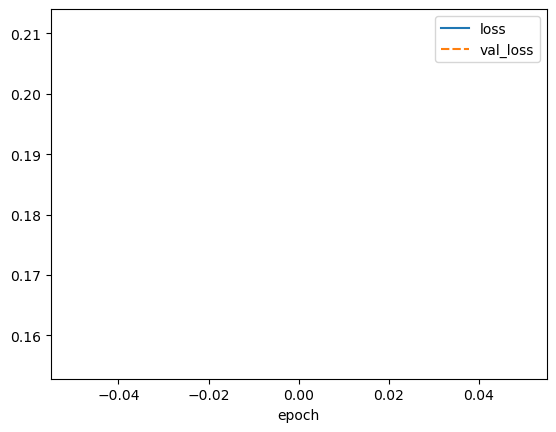

best weights loaded


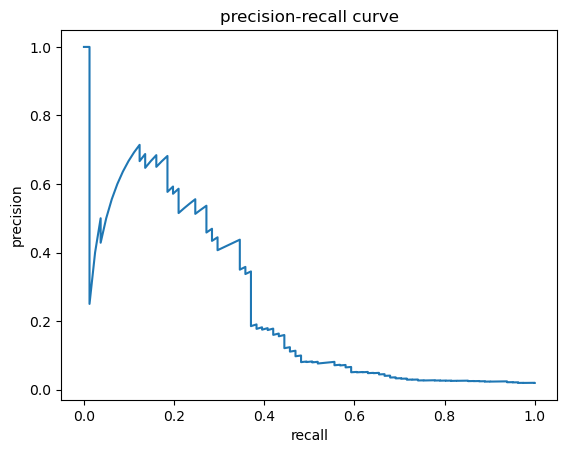

elapsed time: 44.25982642173767
run: 30
{'radius': 2, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B07C7EA90>, <dgl.data.utils.Subset object at 0x0000015C0B189EB0>, <dgl.data.utils.Subset object at 0x0000015C0B189AC0>]


[21:15:54] WARNING: not removing hydrogen atom without neighbors
[21:15:54] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2455490231513977 | Validation Loss 0.19698401987552644 | Validation accuracy 0.9630399816176471


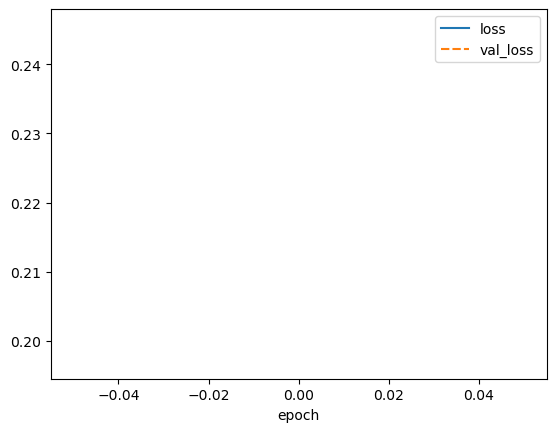

best weights loaded


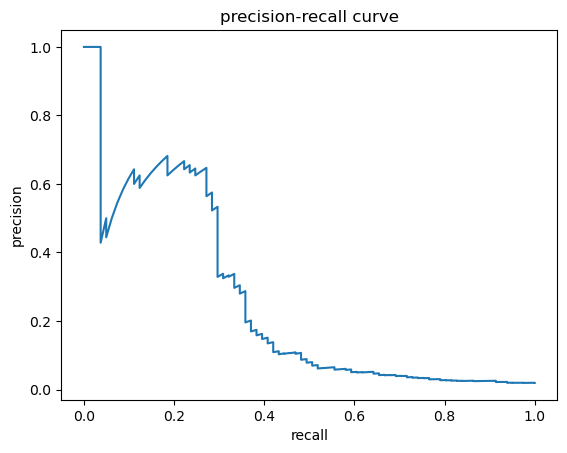

elapsed time: 44.480634450912476
run: 31
{'radius': 2, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B154E78E0>, <dgl.data.utils.Subset object at 0x0000015C08C8E070>, <dgl.data.utils.Subset object at 0x0000015C08C8E6A0>]


[21:16:40] WARNING: not removing hydrogen atom without neighbors
[21:16:40] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23579003729603507 | Validation Loss 0.15373529642820358 | Validation accuracy 0.974609375


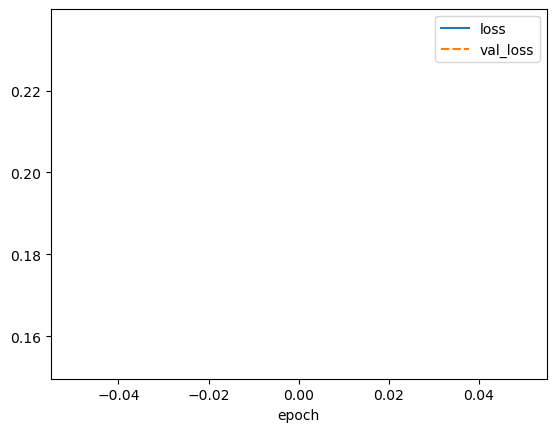

best weights loaded


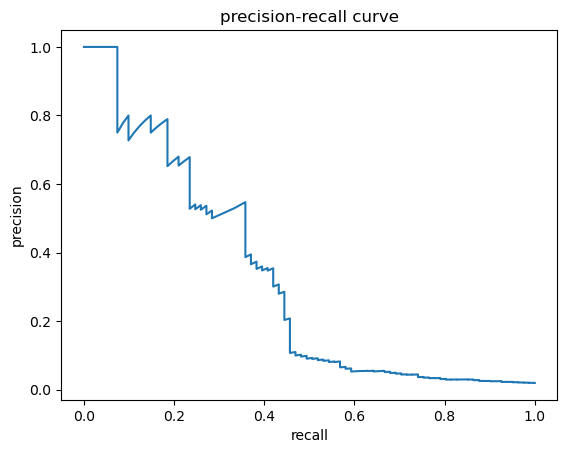

elapsed time: 53.26020622253418
run: 32
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1424EA30>, <dgl.data.utils.Subset object at 0x0000015B154E7550>, <dgl.data.utils.Subset object at 0x0000015B154E73D0>]


[21:17:35] WARNING: not removing hydrogen atom without neighbors
[21:17:35] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21803857882817587 | Validation Loss 0.17010848522186278 | Validation accuracy 0.9642118566176471


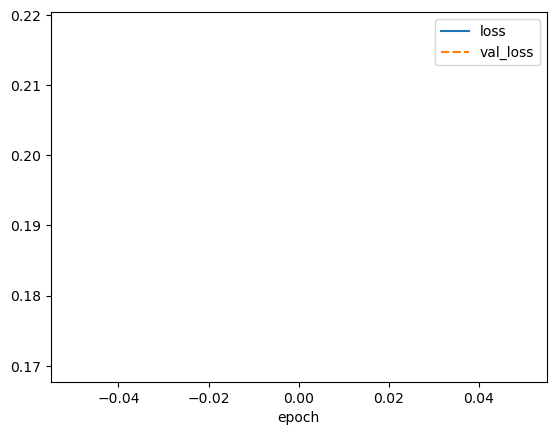

best weights loaded


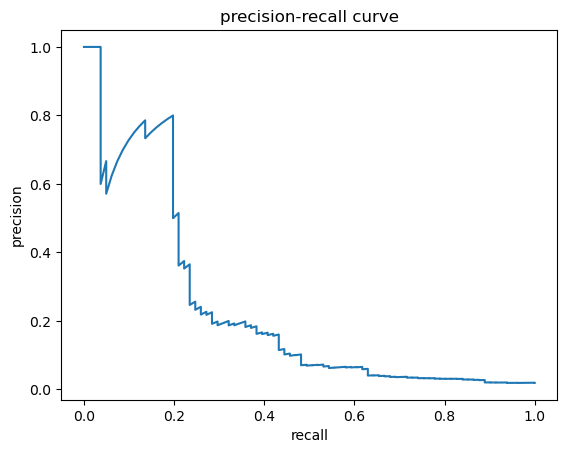

elapsed time: 49.04369878768921
run: 33
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1439F040>, <dgl.data.utils.Subset object at 0x0000015C0B1D0B20>, <dgl.data.utils.Subset object at 0x0000015C0B1D0D90>]


[21:18:22] WARNING: not removing hydrogen atom without neighbors
[21:18:22] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21391912346536462 | Validation Loss 0.13397790417075156 | Validation accuracy 0.974609375


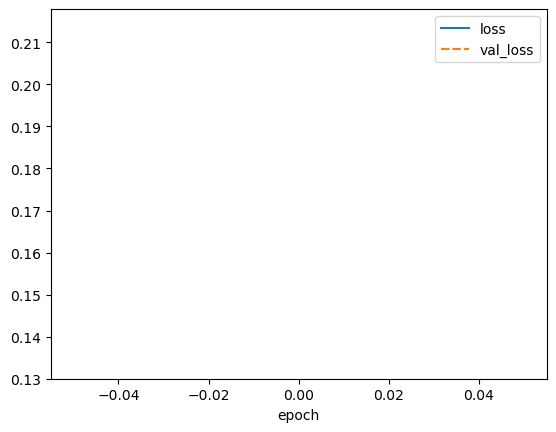

best weights loaded


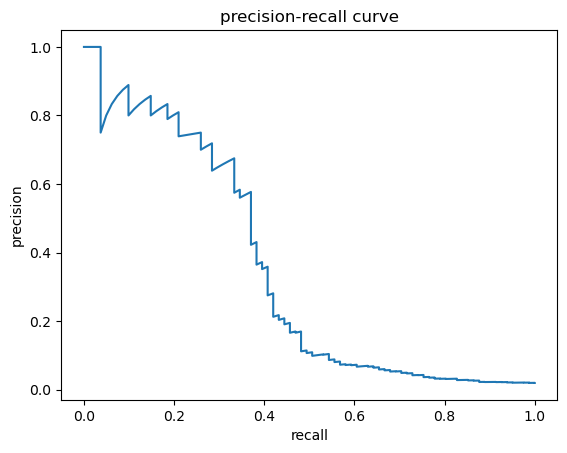

elapsed time: 48.0899076461792
run: 34
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B12654A30>, <dgl.data.utils.Subset object at 0x0000015C0B1BCE20>, <dgl.data.utils.Subset object at 0x0000015B31C610D0>]


[21:19:11] WARNING: not removing hydrogen atom without neighbors
[21:19:11] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19358241806427637 | Validation Loss 0.11357112675905227 | Validation accuracy 0.974609375


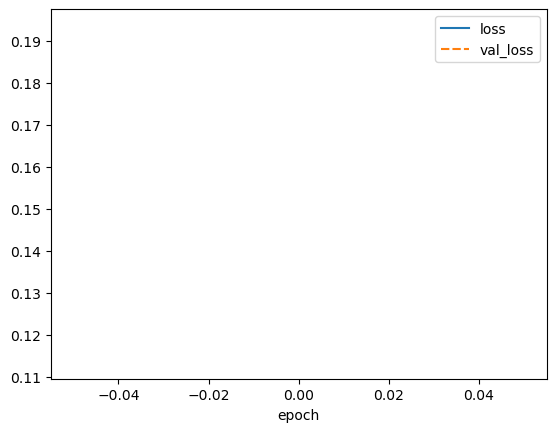

best weights loaded


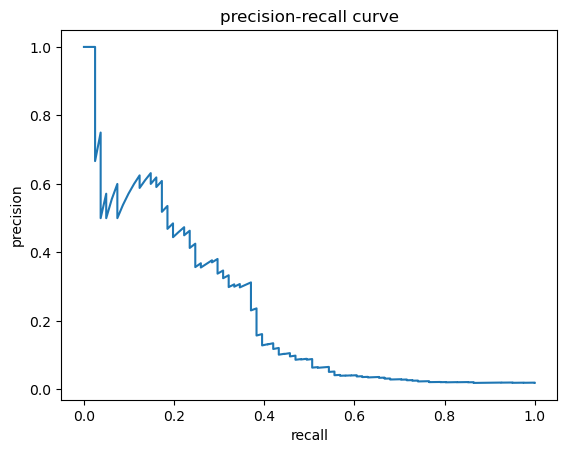

elapsed time: 48.36820387840271
run: 35
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B6E065AF0>, <dgl.data.utils.Subset object at 0x0000015C0B1D9340>, <dgl.data.utils.Subset object at 0x0000015C0B1D9580>]


[21:20:00] WARNING: not removing hydrogen atom without neighbors
[21:20:00] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18974267239823486 | Validation Loss 0.11319687720388175 | Validation accuracy 0.974609375


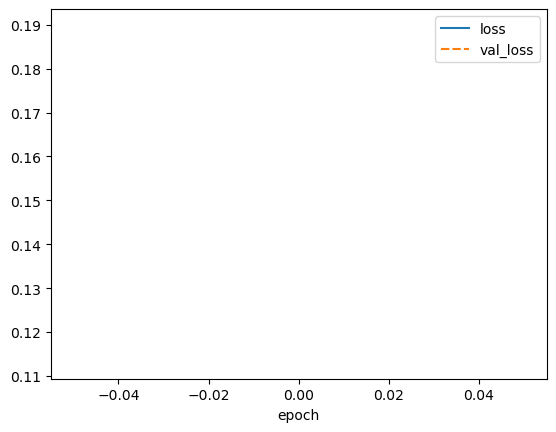

best weights loaded


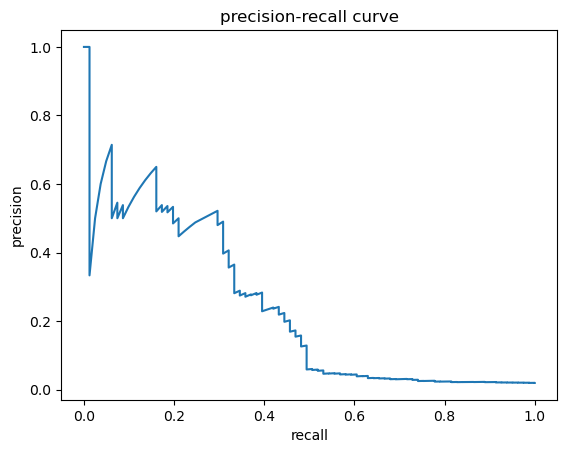

elapsed time: 48.07422208786011
run: 36
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B143132B0>, <dgl.data.utils.Subset object at 0x0000015B31C65550>, <dgl.data.utils.Subset object at 0x0000015B31C657C0>]


[21:20:47] WARNING: not removing hydrogen atom without neighbors
[21:20:47] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20839810800371747 | Validation Loss 0.11974763795733452 | Validation accuracy 0.974609375


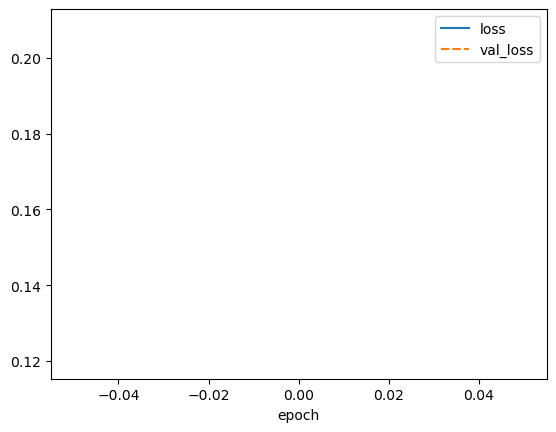

best weights loaded


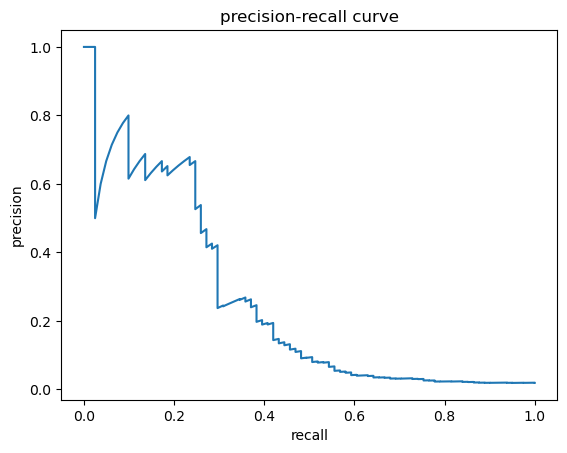

elapsed time: 45.844990730285645
run: 37
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B6E0C5DF0>, <dgl.data.utils.Subset object at 0x0000015C0053FF40>, <dgl.data.utils.Subset object at 0x0000015C005301F0>]


[21:21:33] WARNING: not removing hydrogen atom without neighbors
[21:21:33] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20799739523367447 | Validation Loss 0.11605632528662682 | Validation accuracy 0.974609375


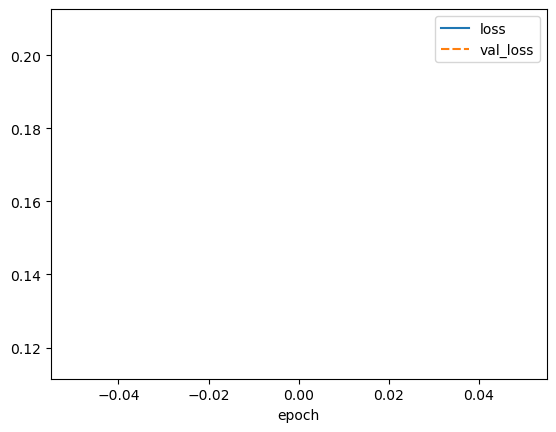

best weights loaded


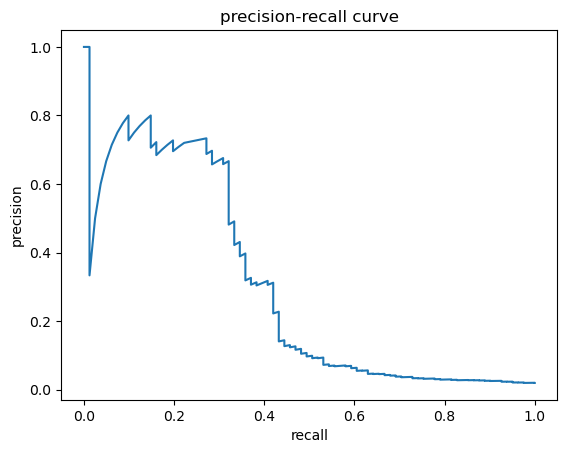

elapsed time: 46.56540274620056
run: 38
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B142701C0>, <dgl.data.utils.Subset object at 0x0000015C0B199AC0>, <dgl.data.utils.Subset object at 0x0000015B32CD1E50>]


[21:22:20] WARNING: not removing hydrogen atom without neighbors
[21:22:20] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22804245804295395 | Validation Loss 0.20342422723770143 | Validation accuracy 0.9630399816176471


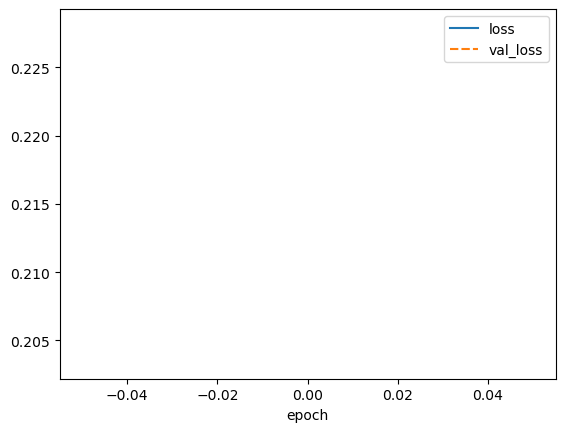

best weights loaded


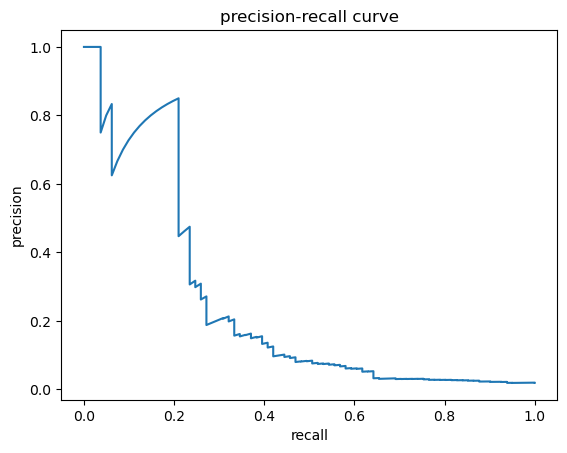

elapsed time: 46.63904047012329
run: 39
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B6E08D730>, <dgl.data.utils.Subset object at 0x0000015B1279D5E0>, <dgl.data.utils.Subset object at 0x0000015C0B2112E0>]


[21:23:06] WARNING: not removing hydrogen atom without neighbors
[21:23:06] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23242481188340622 | Validation Loss 0.15104809850454332 | Validation accuracy 0.974609375


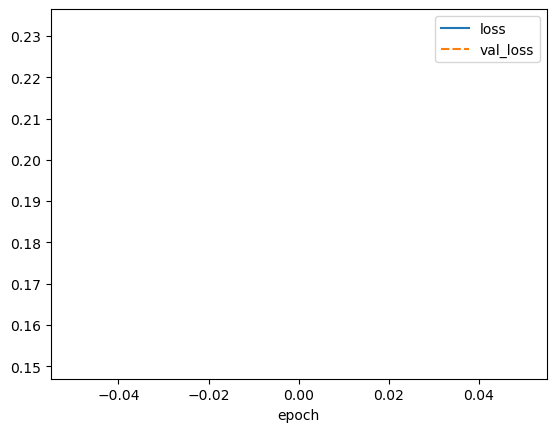

best weights loaded


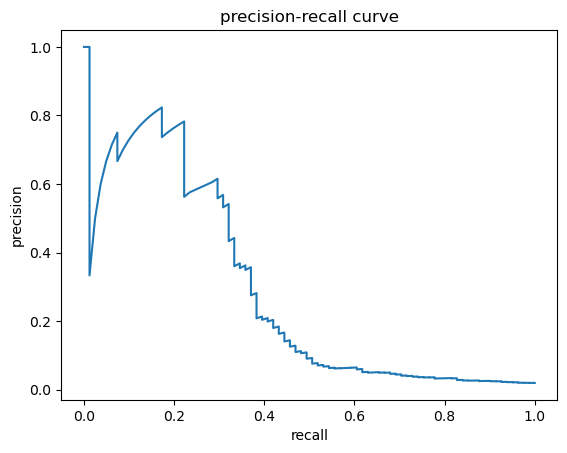

elapsed time: 47.9178729057312
run: 40
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B15867310>, <dgl.data.utils.Subset object at 0x0000015B1590E0A0>, <dgl.data.utils.Subset object at 0x0000015B1590EB20>]


[21:23:56] WARNING: not removing hydrogen atom without neighbors
[21:23:56] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21968262800664612 | Validation Loss 0.12683450281620026 | Validation accuracy 0.975


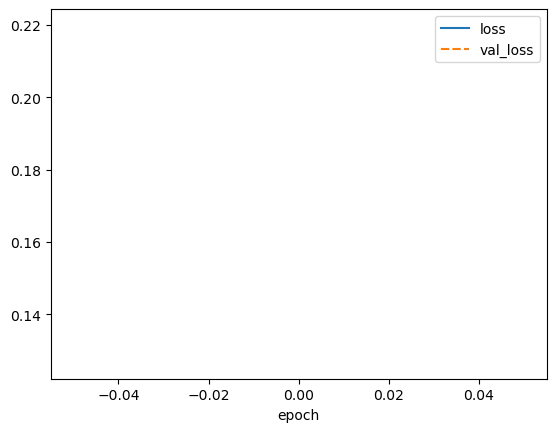

best weights loaded


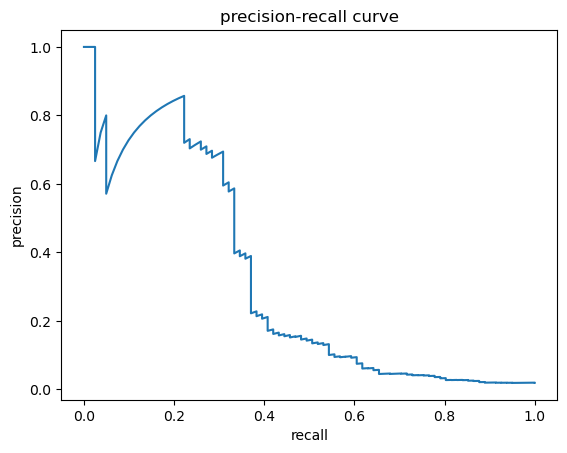

elapsed time: 55.077757835388184
run: 41
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B15F79460>, <dgl.data.utils.Subset object at 0x0000015C0B228820>, <dgl.data.utils.Subset object at 0x0000015C0B228A90>]


[21:24:51] WARNING: not removing hydrogen atom without neighbors
[21:24:51] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21182493594559756 | Validation Loss 0.1336466021835804 | Validation accuracy 0.974609375


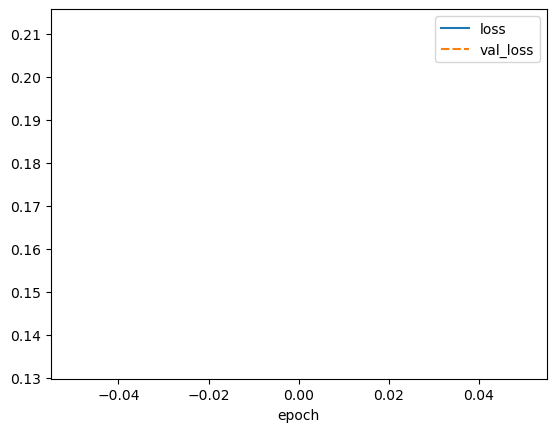

best weights loaded


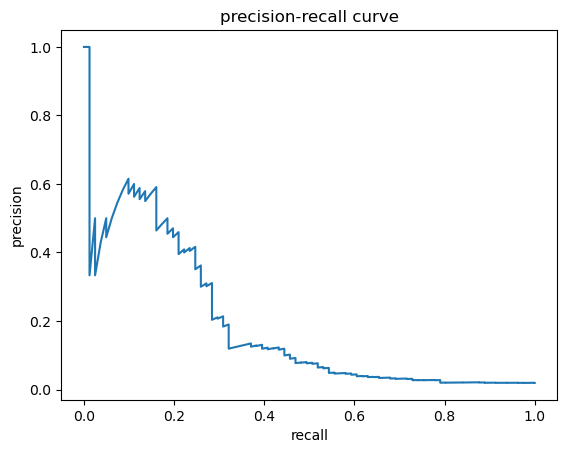

elapsed time: 51.715282678604126
run: 42
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0DE77880>, <dgl.data.utils.Subset object at 0x0000015C01CB7EB0>, <dgl.data.utils.Subset object at 0x0000015C0B228100>]


[21:25:43] WARNING: not removing hydrogen atom without neighbors
[21:25:43] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19953757208405118 | Validation Loss 0.11923856064677238 | Validation accuracy 0.974609375


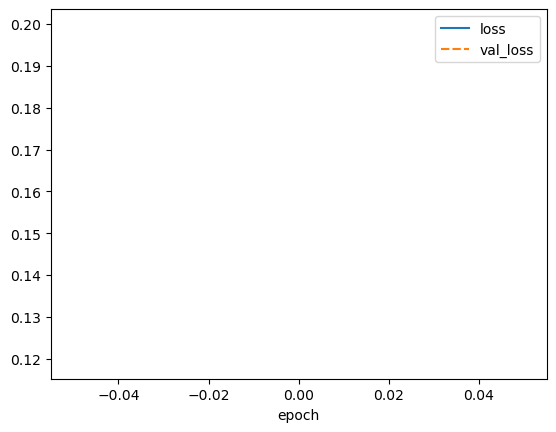

best weights loaded


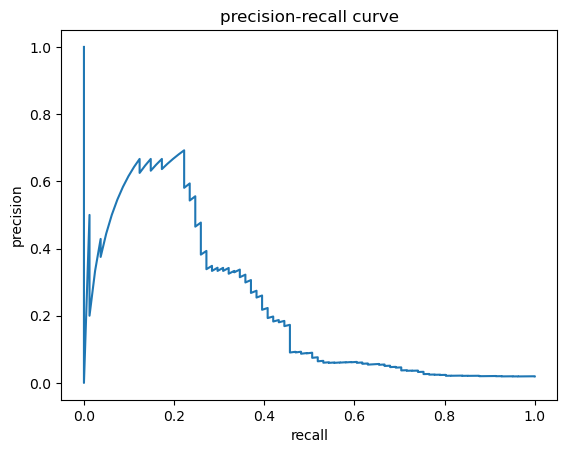

elapsed time: 53.57627248764038
run: 43
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B15E46700>, <dgl.data.utils.Subset object at 0x0000015C01CB7070>, <dgl.data.utils.Subset object at 0x0000015B10798940>]


[21:26:37] WARNING: not removing hydrogen atom without neighbors
[21:26:37] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.192568443264022 | Validation Loss 0.11240275725722312 | Validation accuracy 0.974609375


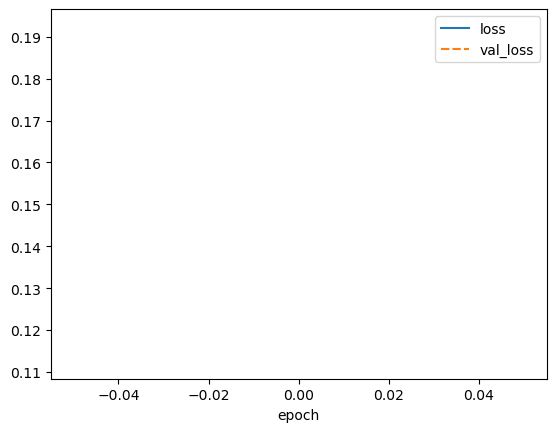

best weights loaded


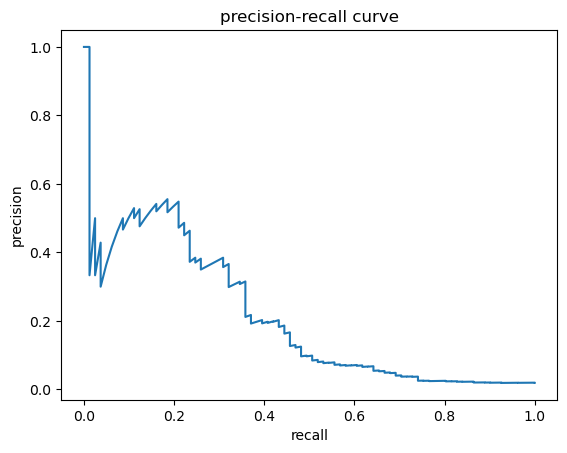

elapsed time: 53.89730739593506
run: 44
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1075F880>, <dgl.data.utils.Subset object at 0x0000015C07626370>, <dgl.data.utils.Subset object at 0x0000015C076265E0>]


[21:27:31] WARNING: not removing hydrogen atom without neighbors
[21:27:31] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20357940300847543 | Validation Loss 0.1163393996655941 | Validation accuracy 0.974609375


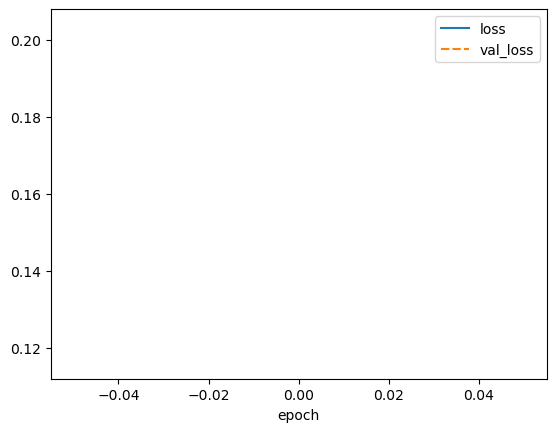

best weights loaded


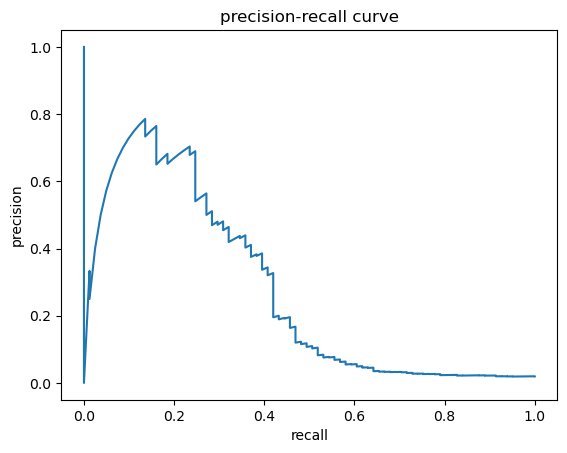

elapsed time: 51.298105239868164
run: 45
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B13DE1D60>, <dgl.data.utils.Subset object at 0x0000015C08C8C430>, <dgl.data.utils.Subset object at 0x0000015C08C8C4F0>]


[21:28:21] WARNING: not removing hydrogen atom without neighbors
[21:28:21] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21399512841846002 | Validation Loss 0.11809981167316437 | Validation accuracy 0.974609375


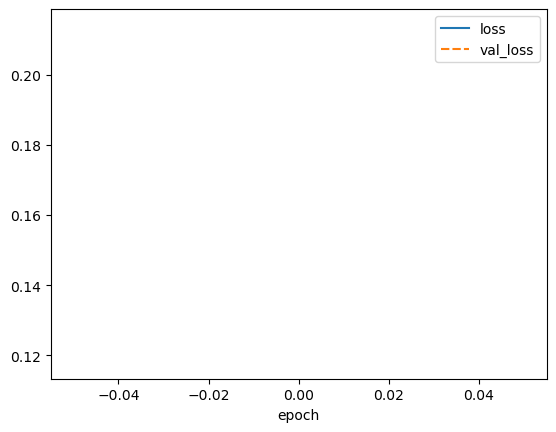

best weights loaded


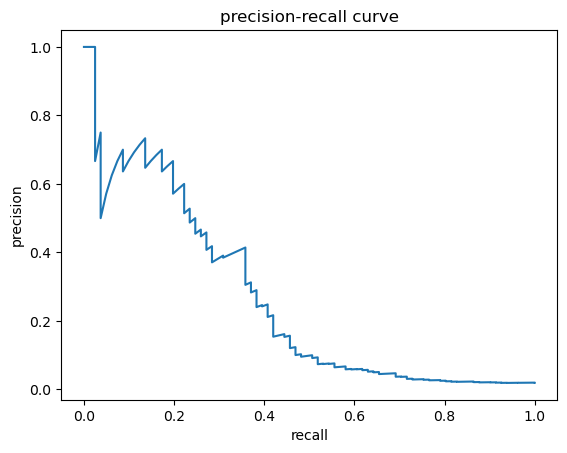

elapsed time: 52.112648010253906
run: 46
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1608C4C0>, <dgl.data.utils.Subset object at 0x0000015C08C6EE20>, <dgl.data.utils.Subset object at 0x0000015C08C6EF70>]


[21:29:13] WARNING: not removing hydrogen atom without neighbors
[21:29:13] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21887373021154694 | Validation Loss 0.131565098464489 | Validation accuracy 0.974609375


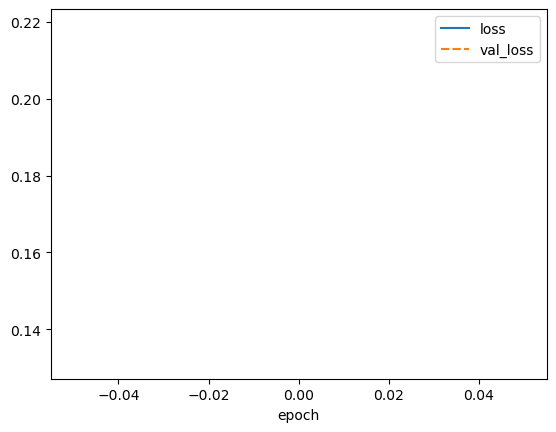

best weights loaded


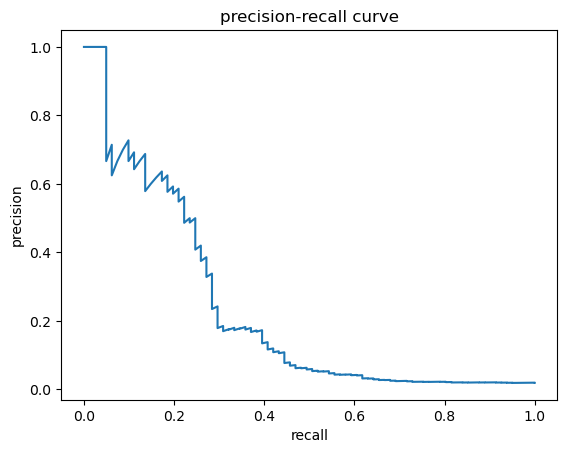

elapsed time: 50.957249879837036
run: 47
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0E41DF10>, <dgl.data.utils.Subset object at 0x0000015BF452F280>, <dgl.data.utils.Subset object at 0x0000015BF452FAF0>]


[21:30:04] WARNING: not removing hydrogen atom without neighbors
[21:30:04] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2262137198086941 | Validation Loss 0.18605949282646178 | Validation accuracy 0.9514705882352942


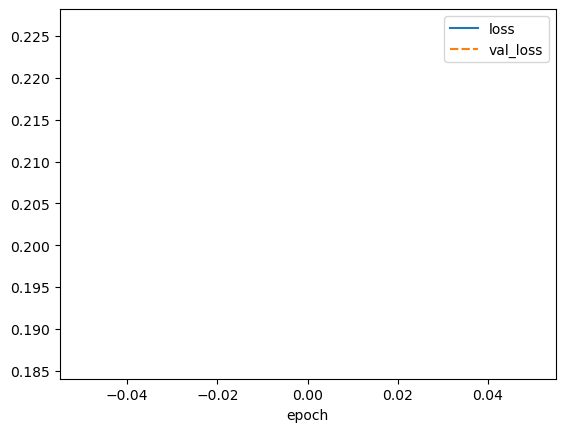

best weights loaded


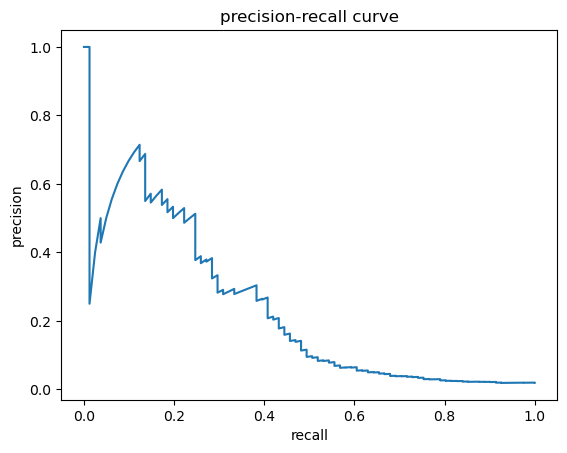

elapsed time: 51.92735481262207
run: 48
{'radius': 3, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1086E910>, <dgl.data.utils.Subset object at 0x0000015C08C26640>, <dgl.data.utils.Subset object at 0x0000015C08C26580>]


[21:30:55] WARNING: not removing hydrogen atom without neighbors
[21:30:55] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22236187349666248 | Validation Loss 0.13876447677612305 | Validation accuracy 0.974609375


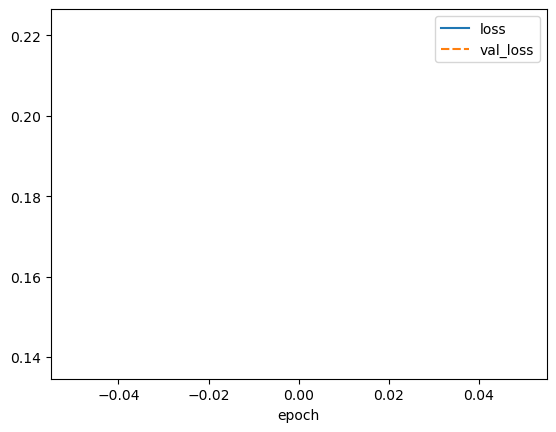

best weights loaded


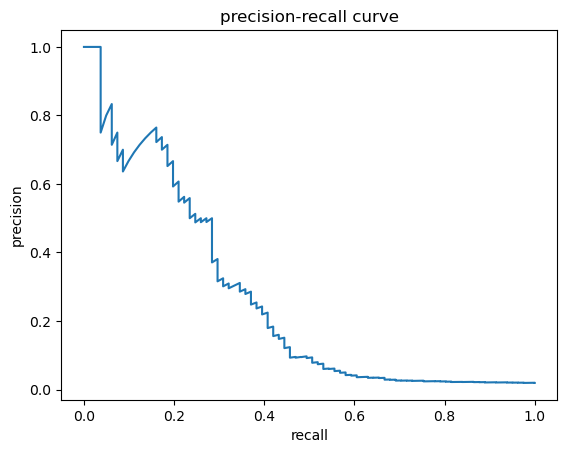

elapsed time: 47.15632915496826
run: 49
{'radius': 3, 'fpSize': 512, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0E3F1D00>, <dgl.data.utils.Subset object at 0x0000015C08C2FF10>, <dgl.data.utils.Subset object at 0x0000015C0B25E1C0>]


[21:31:41] WARNING: not removing hydrogen atom without neighbors
[21:31:41] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2199427785746979 | Validation Loss 0.1862790882587433 | Validation accuracy 0.9630399816176471


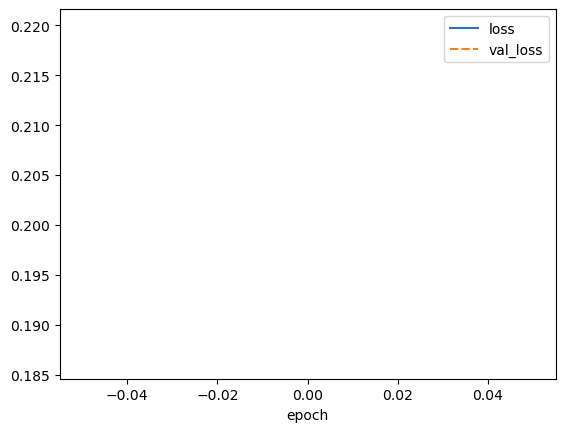

best weights loaded


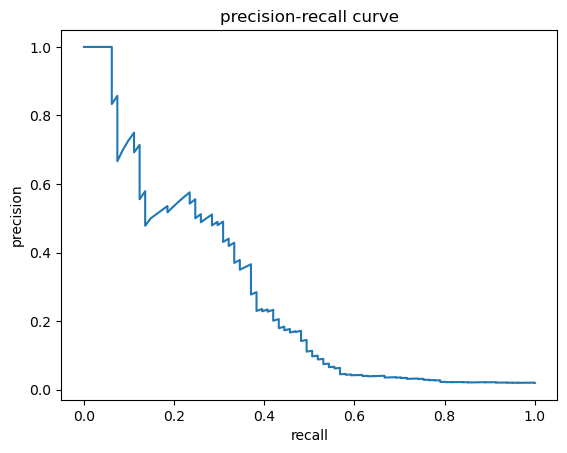

elapsed time: 47.451751470565796
run: 50
{'radius': 3, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0A51B3A0>, <dgl.data.utils.Subset object at 0x0000015B1279D970>, <dgl.data.utils.Subset object at 0x0000015C08C8C2B0>]


[21:32:30] WARNING: not removing hydrogen atom without neighbors
[21:32:30] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19927273871320667 | Validation Loss 0.17913604974746705 | Validation accuracy 0.9630399816176471


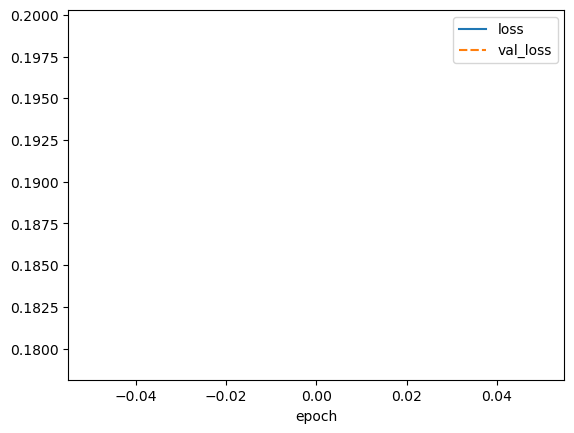

best weights loaded


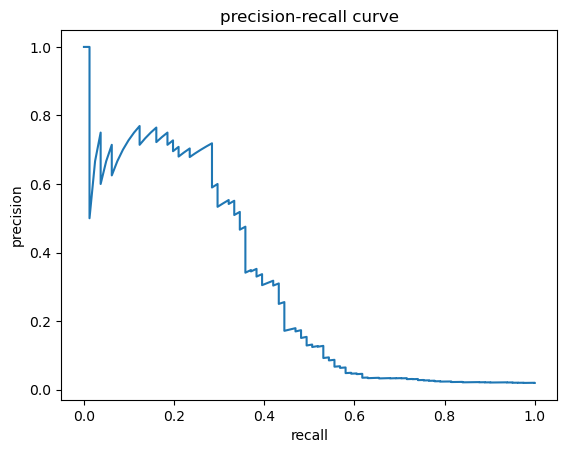

elapsed time: 48.57043933868408
run: 51
{'radius': 3, 'fpSize': 512, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B179FEE20>, <dgl.data.utils.Subset object at 0x0000015C08CCDBE0>, <dgl.data.utils.Subset object at 0x0000015C08CCDD30>]


[21:33:17] WARNING: not removing hydrogen atom without neighbors
[21:33:17] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18525957519357855 | Validation Loss 0.13414182364940644 | Validation accuracy 0.9630399816176471


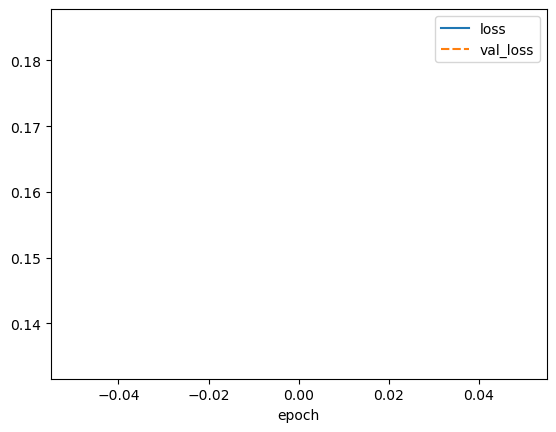

best weights loaded


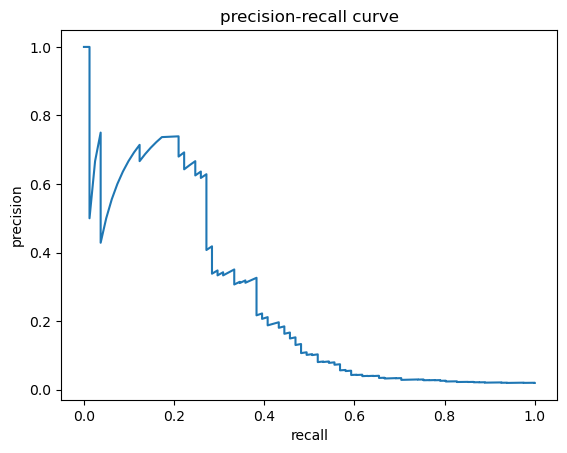

elapsed time: 46.9057731628418
run: 52
{'radius': 3, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B17BDBC40>, <dgl.data.utils.Subset object at 0x0000015C00AB2280>, <dgl.data.utils.Subset object at 0x0000015C00AB24F0>]


[21:34:04] WARNING: not removing hydrogen atom without neighbors
[21:34:04] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20499376772028027 | Validation Loss 0.12451063469052315 | Validation accuracy 0.974609375


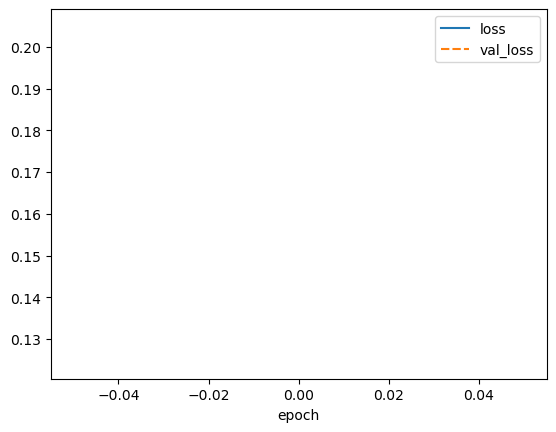

best weights loaded


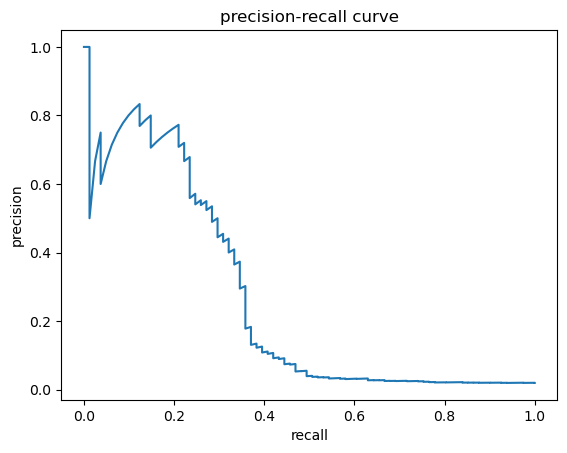

elapsed time: 45.91042733192444
run: 53
{'radius': 3, 'fpSize': 512, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B120B0F10>, <dgl.data.utils.Subset object at 0x0000015C00A84FD0>, <dgl.data.utils.Subset object at 0x0000015C00AB23A0>]


[21:34:50] WARNING: not removing hydrogen atom without neighbors
[21:34:50] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2060258701217897 | Validation Loss 0.12393119186162949 | Validation accuracy 0.974609375


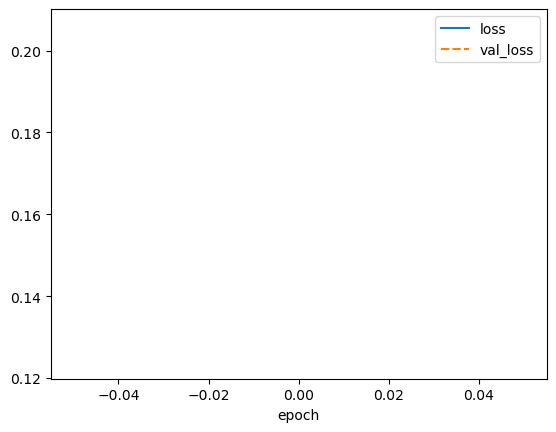

best weights loaded


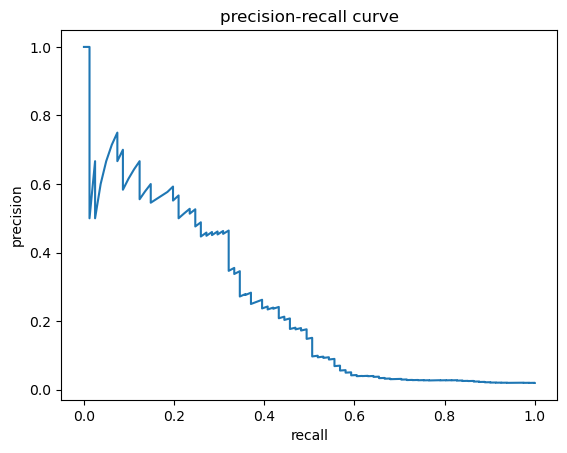

elapsed time: 45.74402976036072
run: 54
{'radius': 3, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B18E376D0>, <dgl.data.utils.Subset object at 0x0000015C00AB2400>, <dgl.data.utils.Subset object at 0x0000015C00AB2970>]


[21:35:37] WARNING: not removing hydrogen atom without neighbors
[21:35:37] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23988593392299884 | Validation Loss 0.19030772447586058 | Validation accuracy 0.9630399816176471


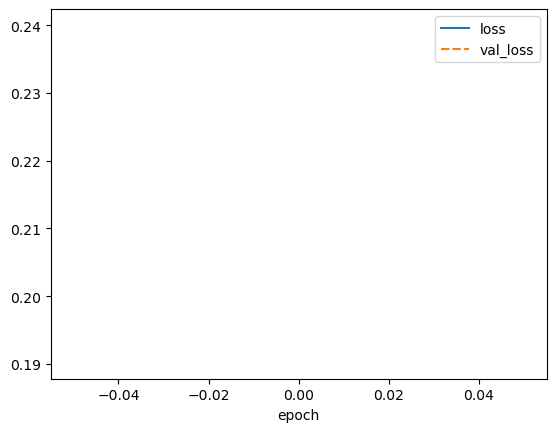

best weights loaded


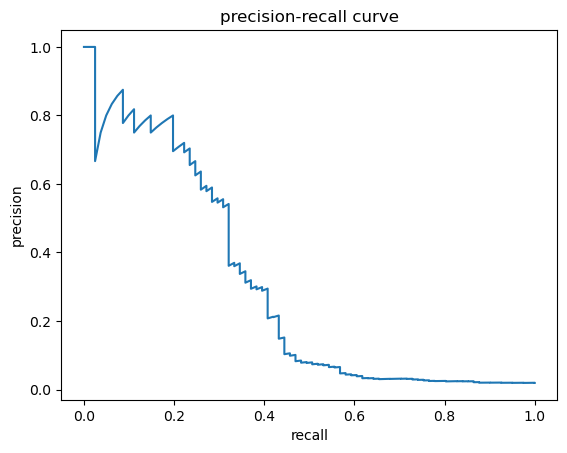

elapsed time: 47.29329538345337
run: 55
{'radius': 3, 'fpSize': 512, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B13F13910>, <dgl.data.utils.Subset object at 0x0000015B5F6E09D0>, <dgl.data.utils.Subset object at 0x0000015B5F6E03D0>]


[21:36:24] WARNING: not removing hydrogen atom without neighbors
[21:36:24] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22702814096754248 | Validation Loss 0.1867210328578949 | Validation accuracy 0.9630399816176471


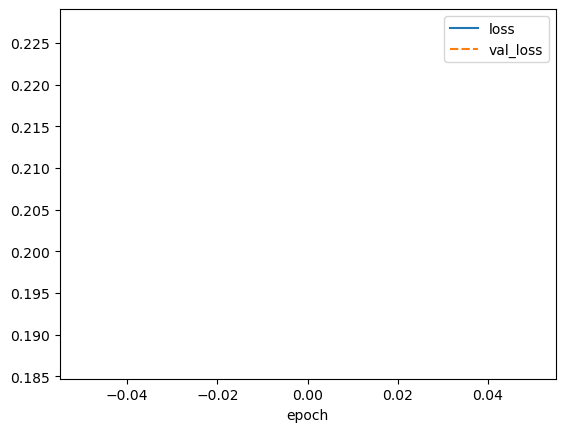

best weights loaded


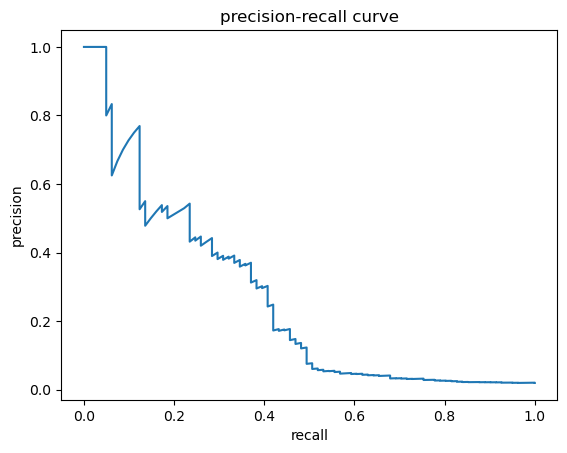

elapsed time: 48.75795793533325
run: 56
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B15EC0A30>, <dgl.data.utils.Subset object at 0x0000015B5F6E07C0>, <dgl.data.utils.Subset object at 0x0000015B5F6E0280>]


[21:37:13] WARNING: not removing hydrogen atom without neighbors
[21:37:13] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23195675512154898 | Validation Loss 0.20207863450050353 | Validation accuracy 0.9630399816176471


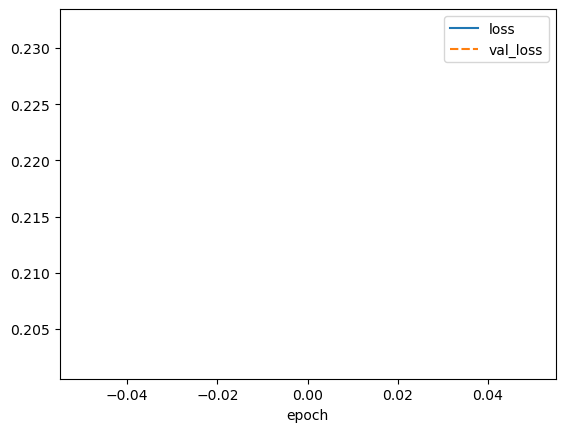

best weights loaded


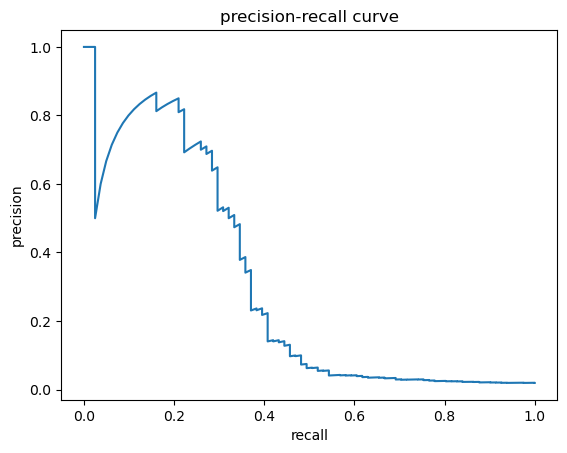

elapsed time: 49.49012470245361
run: 57
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B12794760>, <dgl.data.utils.Subset object at 0x0000015B32CBA2E0>, <dgl.data.utils.Subset object at 0x0000015B32CBA820>]


[21:38:03] WARNING: not removing hydrogen atom without neighbors
[21:38:03] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2169504276279247 | Validation Loss 0.16790532767772676 | Validation accuracy 0.9630399816176471


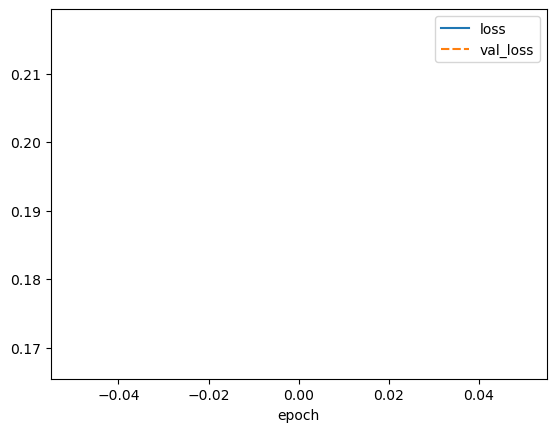

best weights loaded


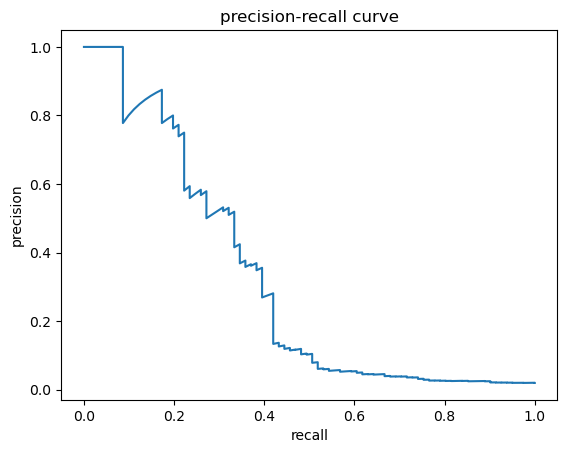

elapsed time: 50.454285860061646
run: 58
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0B825AF0>, <dgl.data.utils.Subset object at 0x0000015B32CC2BB0>, <dgl.data.utils.Subset object at 0x0000015B32CC2B20>]


[21:38:53] WARNING: not removing hydrogen atom without neighbors
[21:38:53] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.1964635629997109 | Validation Loss 0.11166720129549504 | Validation accuracy 0.974609375


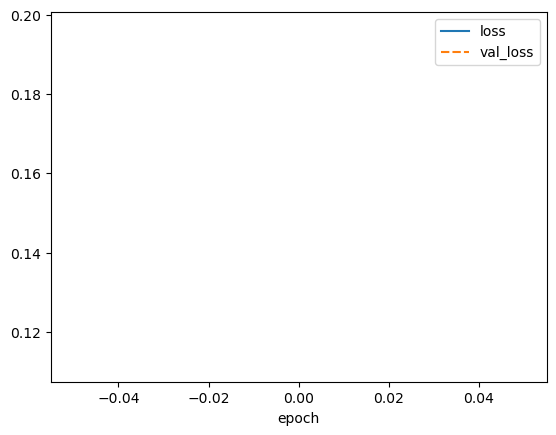

best weights loaded


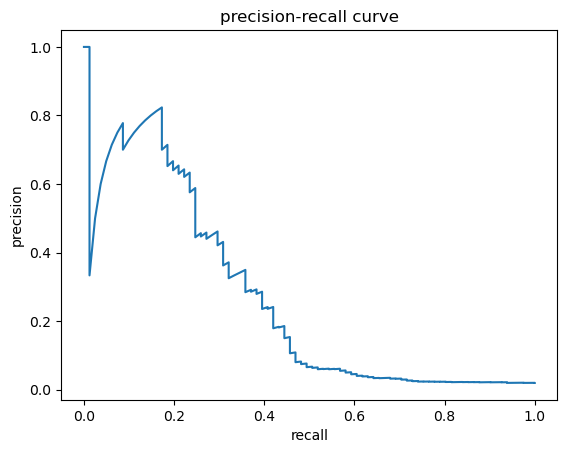

elapsed time: 50.239789724349976
run: 59
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B190D03D0>, <dgl.data.utils.Subset object at 0x0000015B32CBAD90>, <dgl.data.utils.Subset object at 0x0000015B32CBA070>]


[21:39:43] WARNING: not removing hydrogen atom without neighbors
[21:39:43] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18717335458054687 | Validation Loss 0.13761842548847197 | Validation accuracy 0.9630399816176471


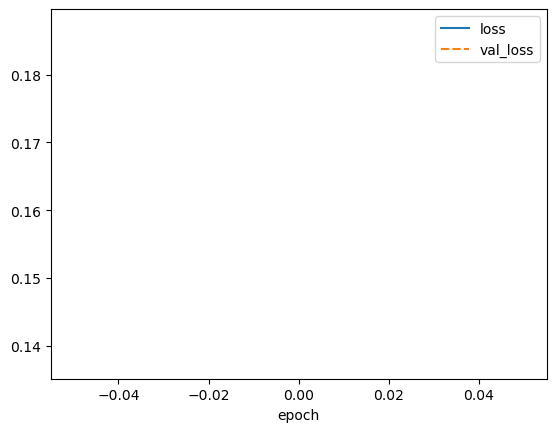

best weights loaded


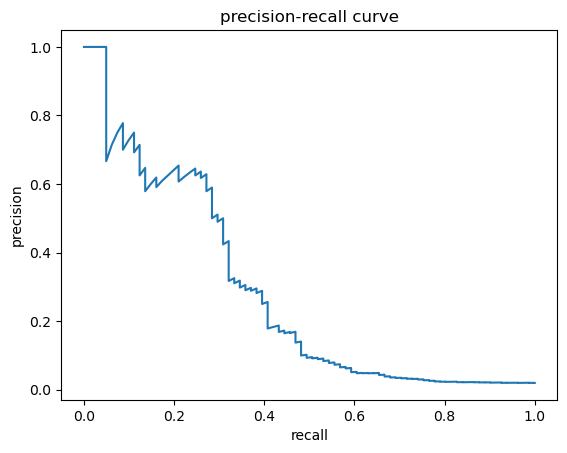

elapsed time: 50.5825674533844
run: 60
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1015FE80>, <dgl.data.utils.Subset object at 0x0000015C0B1CC640>, <dgl.data.utils.Subset object at 0x0000015C0B1CC8B0>]


[21:40:34] WARNING: not removing hydrogen atom without neighbors
[21:40:34] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2029653609250531 | Validation Loss 0.12223231196403503 | Validation accuracy 0.974609375


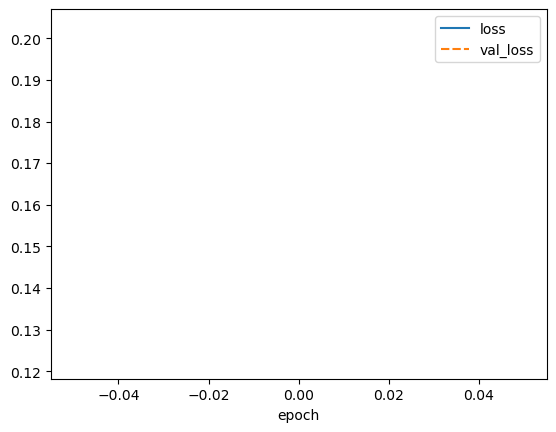

best weights loaded


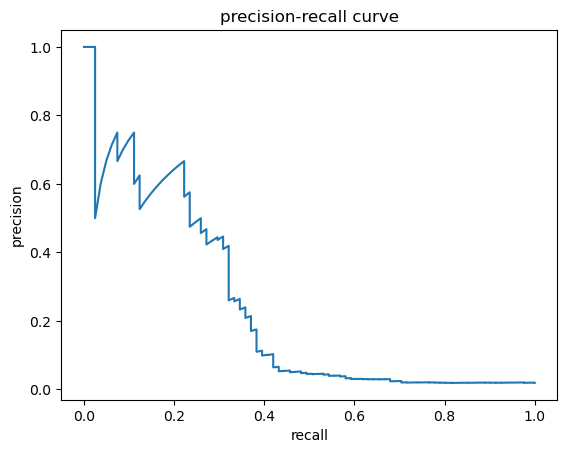

elapsed time: 48.77573037147522
run: 61
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B6E065AF0>, <dgl.data.utils.Subset object at 0x0000015BF48F8430>, <dgl.data.utils.Subset object at 0x0000015BF48F86A0>]


[21:41:23] WARNING: not removing hydrogen atom without neighbors
[21:41:23] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20911419978647522 | Validation Loss 0.11899668425321579 | Validation accuracy 0.974609375


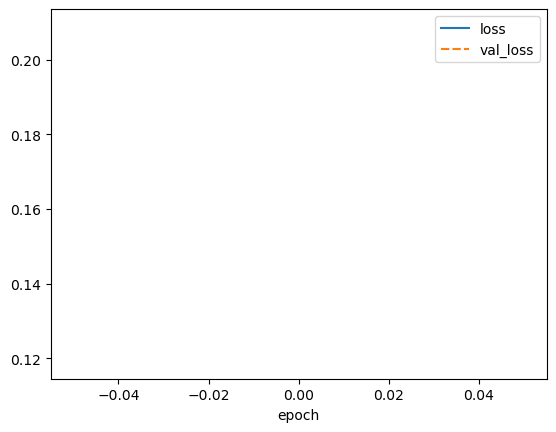

best weights loaded


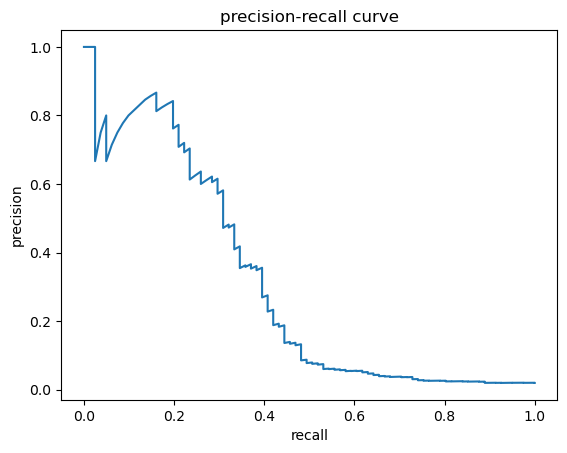

elapsed time: 48.28925561904907
run: 62
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0B1E9880>, <dgl.data.utils.Subset object at 0x0000015B179FE4C0>, <dgl.data.utils.Subset object at 0x0000015B179FEDC0>]


[21:42:12] WARNING: not removing hydrogen atom without neighbors
[21:42:12] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.24191486925789804 | Validation Loss 0.180028036236763 | Validation accuracy 0.9630399816176471


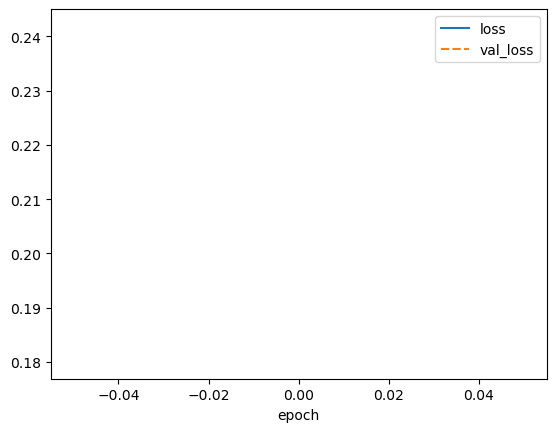

best weights loaded


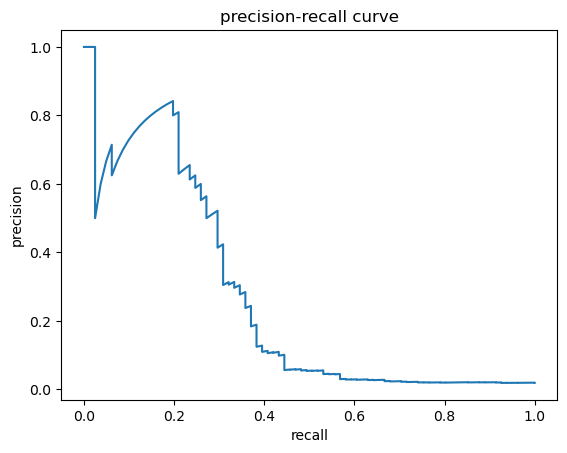

elapsed time: 48.753291606903076
run: 63
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B07C7EC70>, <dgl.data.utils.Subset object at 0x0000015B31533970>, <dgl.data.utils.Subset object at 0x0000015B31533EB0>]


[21:43:00] WARNING: not removing hydrogen atom without neighbors
[21:43:00] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.22555748441002585 | Validation Loss 0.1524415373802185 | Validation accuracy 0.974609375


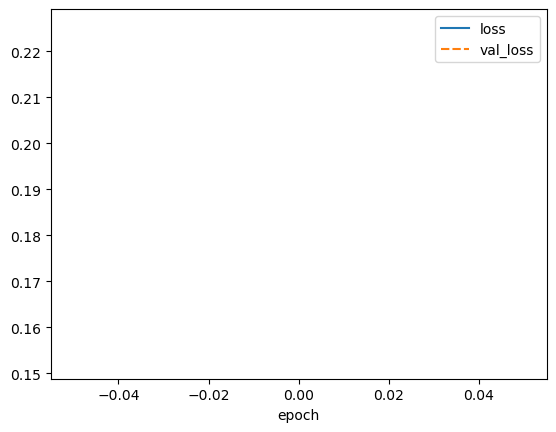

best weights loaded


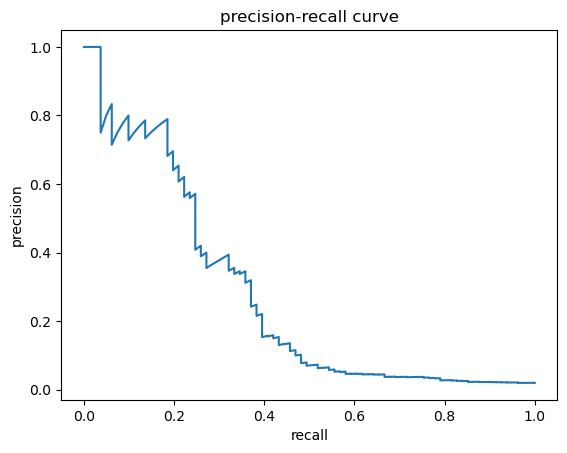

elapsed time: 50.55859661102295
run: 64
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B19300CA0>, <dgl.data.utils.Subset object at 0x0000015C0B1C8CA0>, <dgl.data.utils.Subset object at 0x0000015C0B1C80A0>]


[21:43:53] WARNING: not removing hydrogen atom without neighbors
[21:43:53] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.2215076768488595 | Validation Loss 0.1309049241244793 | Validation accuracy 0.974609375


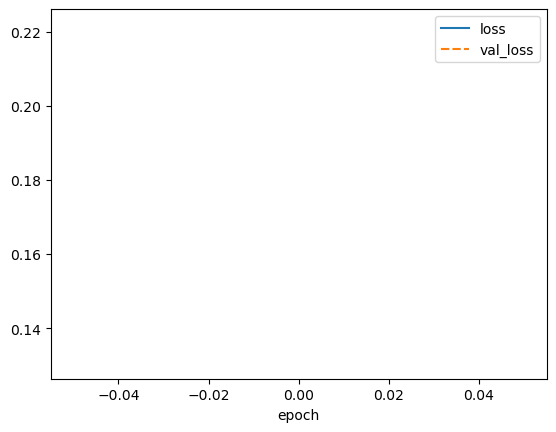

best weights loaded


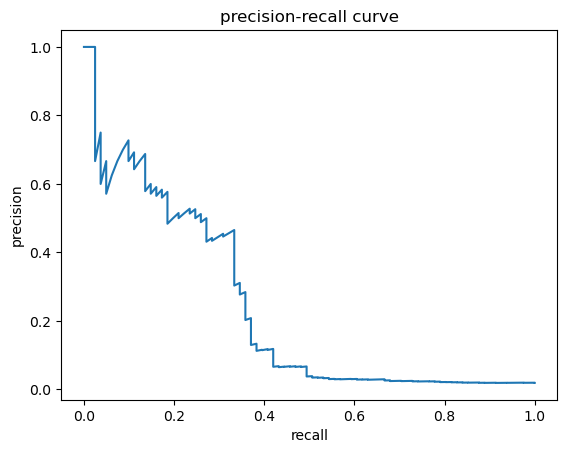

elapsed time: 54.87755632400513
run: 65
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B6E0C5DF0>, <dgl.data.utils.Subset object at 0x0000015C0B1A36D0>, <dgl.data.utils.Subset object at 0x0000015C0B1A3940>]


[21:44:47] WARNING: not removing hydrogen atom without neighbors
[21:44:47] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.20834776984922815 | Validation Loss 0.14532919675111772 | Validation accuracy 0.9630399816176471


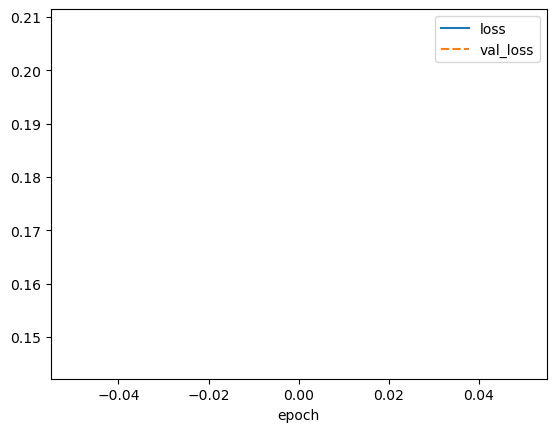

best weights loaded


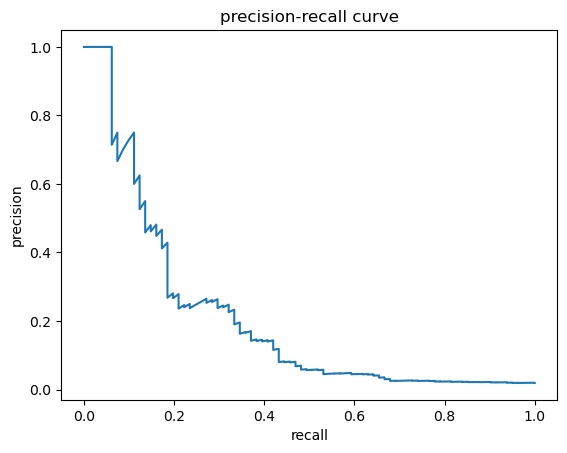

elapsed time: 54.89117169380188
run: 66
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B19588400>, <dgl.data.utils.Subset object at 0x0000015C08CB87F0>, <dgl.data.utils.Subset object at 0x0000015C08CB88B0>]


[21:45:42] WARNING: not removing hydrogen atom without neighbors
[21:45:42] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.19977989770246274 | Validation Loss 0.12150619626045227 | Validation accuracy 0.974609375


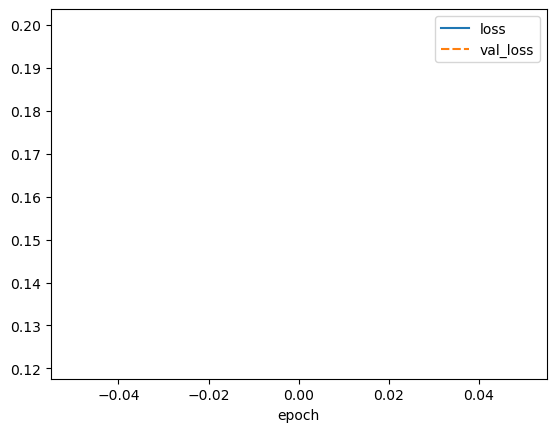

best weights loaded


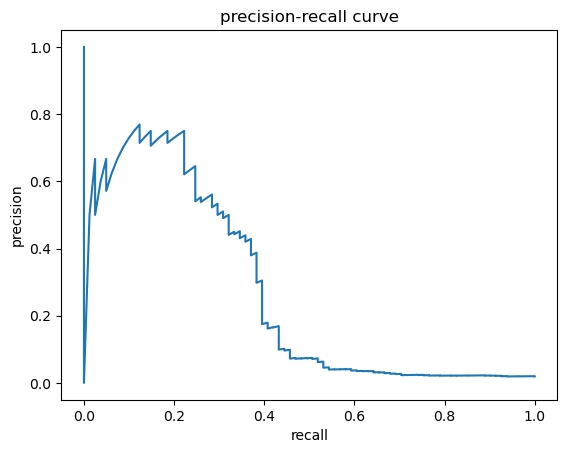

elapsed time: 56.902668476104736
run: 67
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B107196A0>, <dgl.data.utils.Subset object at 0x0000015C0B2CC430>, <dgl.data.utils.Subset object at 0x0000015B18E8E6D0>]


[21:46:39] WARNING: not removing hydrogen atom without neighbors
[21:46:39] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.18939332325350156 | Validation Loss 0.11541680693626404 | Validation accuracy 0.974609375


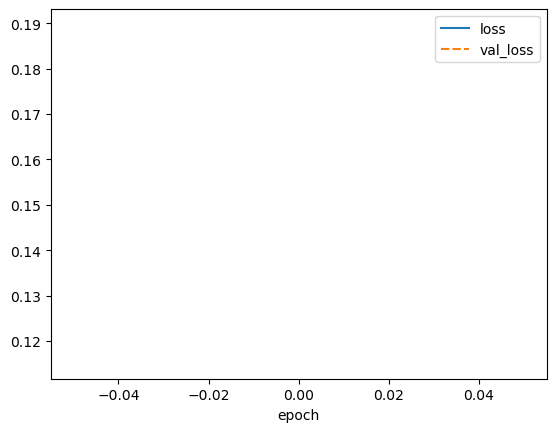

best weights loaded


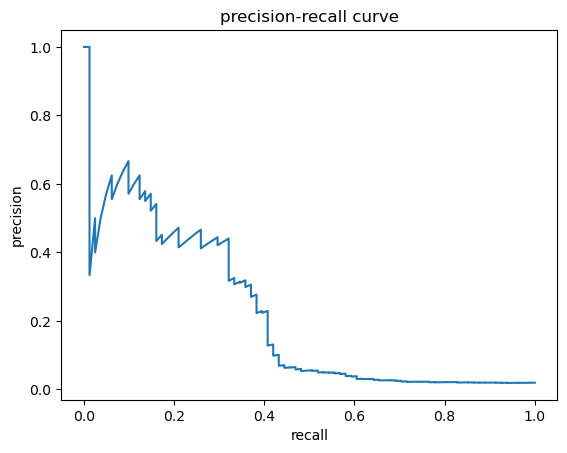

elapsed time: 57.90115022659302
run: 68
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B19243520>, <dgl.data.utils.Subset object at 0x0000015C08CBF6A0>, <dgl.data.utils.Subset object at 0x0000015C08CBF280>]


[21:47:37] WARNING: not removing hydrogen atom without neighbors
[21:47:37] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21644371567350446 | Validation Loss 0.175599604845047 | Validation accuracy 0.9514705882352942


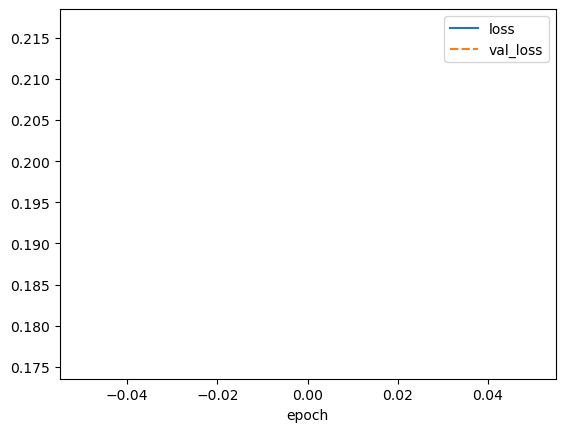

best weights loaded


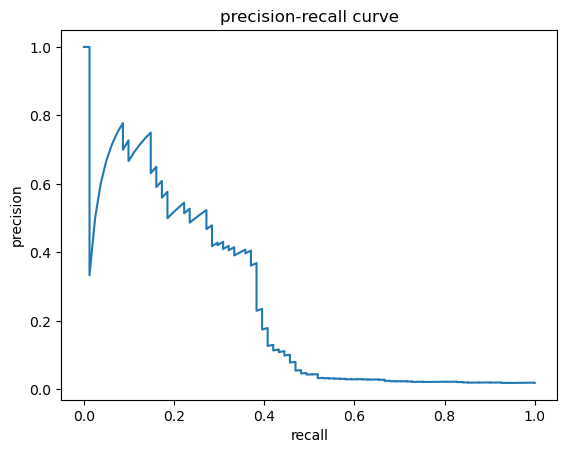

elapsed time: 55.59226846694946
run: 69
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B0AF246D0>, <dgl.data.utils.Subset object at 0x0000015C08CBF5E0>, <dgl.data.utils.Subset object at 0x0000015C08CBFE20>]


[21:48:32] WARNING: not removing hydrogen atom without neighbors
[21:48:32] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21402260774012768 | Validation Loss 0.19642168134450913 | Validation accuracy 0.9514705882352942


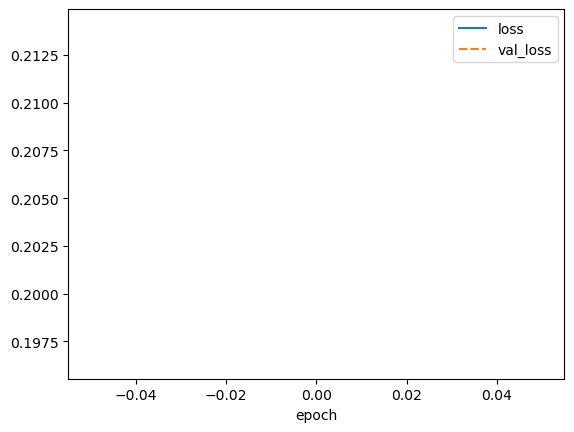

best weights loaded


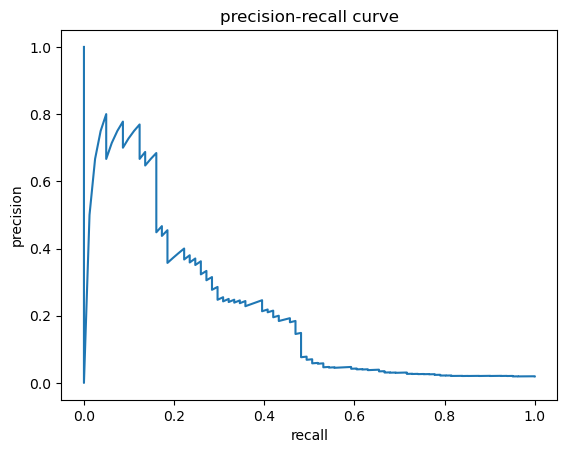

elapsed time: 53.75920033454895
run: 70
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B13DDD850>, <dgl.data.utils.Subset object at 0x0000015C08CBFF10>, <dgl.data.utils.Subset object at 0x0000015C08CBF910>]


[21:49:26] WARNING: not removing hydrogen atom without neighbors
[21:49:26] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.23299727656624533 | Validation Loss 0.16957141757011412 | Validation accuracy 0.9630399816176471


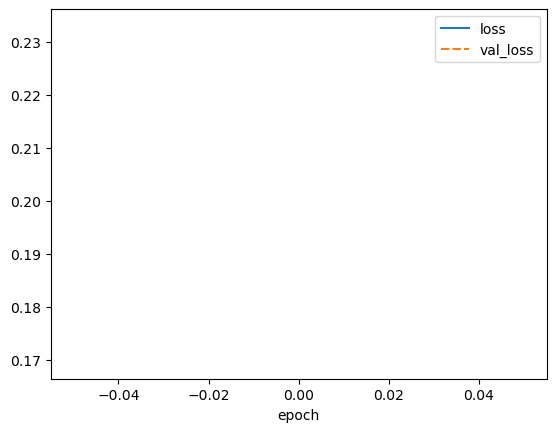

best weights loaded


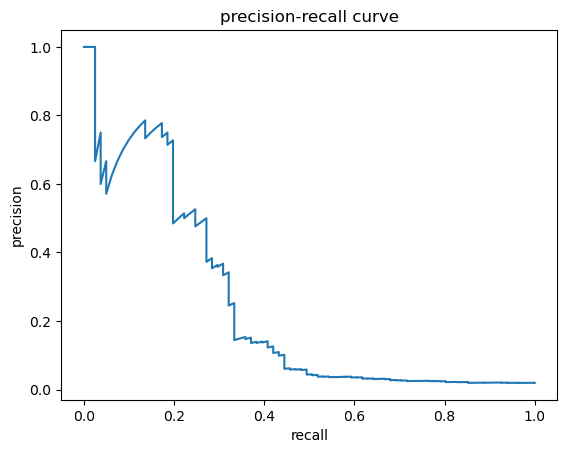

elapsed time: 52.98091793060303
run: 71
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000015B1C866CA0>, <dgl.data.utils.Subset object at 0x0000015C0B1B2D90>, <dgl.data.utils.Subset object at 0x0000015C0B1B2DF0>]


[21:50:20] WARNING: not removing hydrogen atom without neighbors
[21:50:20] WARNING: not removing hydrogen atom without neighbors


Epoch 0 | Train Loss 0.21917250233166147 | Validation Loss 0.15043914467096328 | Validation accuracy 0.974609375


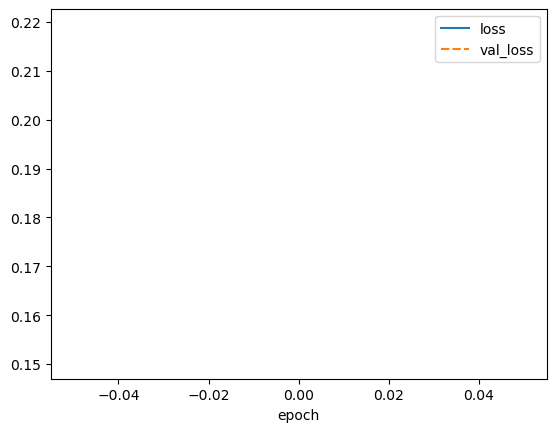

best weights loaded


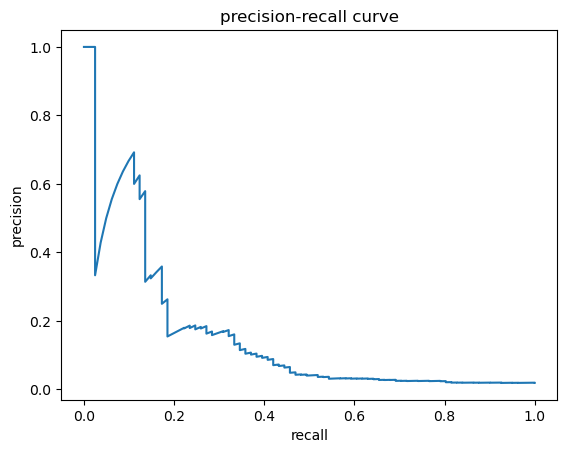

elapsed time: 52.880619287490845


In [12]:
import time
counter = 0
for combination in combinations:
    print(f"run: {counter}")
    t0 = time.time()
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_hiv()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_class_hiv.pkl'
        else: 
            loader_file = 'datasets_class_hiv.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(morgan_data_val, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_classification_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = classification_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
        plt.show()
        precisions, recalls, thresholds, dfs = predict_classification(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_classification_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = classification_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
        plt.show()
        precisions, recalls, thresholds, dfs = predict_classification_fingerprint(model, test_loader, device, best_model_weights)

    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")

    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #classification
    save_dict["precisions"] = precisions
    save_dict["recalls"] = recalls
    save_dict["thresholds"] = thresholds
    from sklearn.metrics import precision_recall_curve, auc
    save_dict["auc"] = auc(recalls, precisions)

    save_dict["batch_size"] = batch_size

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
        
    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    